# North Carolina Public Schools Education Data Project

## Purpose


 

The goal of this project is to explore the data acquired from The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC to assess different variables to use to build models and analyze the data. 

The model training to achieve these goals will be supervised learning of both regression and binary classification based on different response variables which we will have to choose or create from the existing data sets.  

In order to satisfy the needs of MSDS 7331, this project will be split into multiple phases/assignments. This submission will be the first assignment that will include the overall data management, EDA, data tidying, and initial feature selection/engineering. Future projects will contain further iterations of the above tasks as well as different models' training and evaluation. 

What follows is the combined work of Lu Cheng, Phil Edwards, Scott Herford, and Nuoya Rezsonya. 

We will start with library and data directory initialization code with the following steps needed to ensure the notebook runs properly. 

1. Set your folder path variables below. 
2. Download the attached files into the path folder you selected:
    4. PublicHighSchools2014_ML.csv
    5. PublicHighSchools2015_ML.csv
    6. PublicHighSchools2016_ML.csv
    7. PublicHighSchools2017_ML.csv
8. Download the attached ViolinPlot.png file into the same directory that this notebook resides. OR...
    9. You can also download the .csv files and build out the directory structure below to get the violin plot section to work, but the .png file is included to easily show the output for that section since we revert to the school data sets. 
        10. directory + '2014'+'/Raw Datasets/accDrillDown.csv
        10. directory + '2015'+'/Raw Datasets/accDrillDown.csv
        10. directory + '2016'+'/Raw Datasets/accDrillDown.csv
        10. directory + '2017'+'/Raw Datasets/accDrillDown.csv
11. This was created using Python 3.

In [1]:
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
# Alteration from reference code include removal of schoolYear as these will be fixed years in the following section. 

#import required Libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import string

#**********************************************************************************
# Set the following variables before running this code!!!
#**********************************************************************************

#Location where copies of the raw data files will be downloaded and saved as csv files.
directory = 'C:/Users/flip/Desktop/SMU/MSDS7331/data/HighML/'
schDir = 'C:/Users/flip/Desktop/SMU/MSDS7331/data/HighSch/'

## Business Understanding

Leveraging historical, secondary data collected from high schools in the state of North Carolina, the purpose of the following study is to investigate what factors influence whether or not a student enrolls in a post-secondary institution to further their education. Lastly, we utilize the following data in order to predict 2018 outcomes, such as college enrollment, SAT scores, and graduation rates. Originally collected from the North Carolina Public Schools Report Card and Statistical Profiles Databases, high school data from 2014-2017 contains statistics on student and school performance as well as other factors, such as academic growth, diversity, school safety, educator experience, school funding, and educational attainment.

Specifically, we will use data specific to educational attainment, which can be found in The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools. Using statistical modeling, data mining techniques, and machine learning algorithms, we aspire to narrow our focus as to what are the most important factors that explain a student’s choice to enroll in college as well as predict outcomes related to educational attainment of high school students. With appropriate use of the techniques listed above, we would find a good prediction algorithm to achieve between 85-100% accuracy in producing output that explains achievement of high school students in the state of North Carolina. The value obtained from the following analysis will benefit the following areas of study: public policy, secondary education, higher education, immigration, racial inequality, economic policy, social stratification, diversity, and many more.

With the rising cost of education in the United States, we can see a climate where government budgets continue to shrink, the demand for hiring more educators continues to increase, and student outcomes fail to satisfy government officials as well as the public when so much economic capital is being filtered into the education system. Furthermore, we continue to observe the output of loads of research that points to our education system failing to provide the necessary environments for cultivating and eliminating much of the existing barriers that hinder student opportunities and upward mobility. This particularly pertains to programs designed to assist students in learning development and promoting more students to apply and enroll in post-secondary education.  Foote, Schulkind, and Shapiro (2015) note a large portion of research exists that helps “understand the barriers of college entry, especially for low-income students.” These barriers can be classified into three categories: achievement barriers, financial barriers, and information/administrative barriers (Foote et. al, 2015). 

For decades, academia as well as educational research firms have produced data on what educational inputs affect achievement in education, and much research has been focused on the financial component to higher education. With regard to the information barrier, according to Hoxby and Turner (2013), in order to increase applications from students to more colleges and colleges of higher-quality, school administrations/systems should provide “high-ability, low-income students with personalized information about the application process and college costs.”  Increasing counseling and mentoring to students throughout the application process increases college enrollment as found by Avery (2010) and Carrell and Sacerdote (2013).  Through experimental research, Oreopoulos and Dunn (2012) added that showing high school students a short video that discusses the benefits of higher education changed their beliefs about expected ROIs. Thus, it is our goal to reproduce some of the same outputs currently in existence which explain trends related to educational attainment and shed some light on what may be the most important factors in explaining whether or not students enroll in post-secondary education using the methods explained above.

##### References:
__Avery, C. (2010).__ _The effects of college counseling on high-achieving, low-income students_ (NBER Working Paper 16359).<br> 
<br> __Carrell, S., & Sacerdote, B. (2013).__ _Late interventions matter too: The case of college coaching New Hampshire_ (NBER Working Paper 19031).<br> 
<br>__Foote, A., Schulkind, L., & Shapiro, T. (2015).__ _Missed signals: The effect of ACT college-readiness measures on post-secondary decisions._ Economics of Education Review, 46, 39.<br> 
<br>__Hoxby, C.M., & Turner (2013).__ _Expanding college opportunities for high-achieving, low income students_ (SIEPR Discussion Paper 12-014).<br> 
<br>__Oreopoulos,P., & Dunn, R. (2012).__ _Information and college access: Evidence from a randomized field experiment_ (NBER Working Paper 18551).<br> 

## Data Meaning Type

The original raw data are collected from http://www.ncpublicschools.org/. The final processed data, which this project will use, is a combination of years 2014-2017 North Carolina public high school machine learning data sets which are the final data sets in Dr. Jake Drew's preprocessing pipeline code at https://github.com/jakemdrew/EducationDataNC. The following code blocks will inner concatenate (by school code/unit code) all high school machine learning data sets for 4 different years. The result will be a final numeric data set of 1904 rows and 288 attributes. An attributes description table has also been created to help one understanding the data and can be found following the data type and statistics descriptions below. 

First, we will initialize the data frames by reading the 2014-2017 .csv files from our data directory. 

In [2]:
#### Reference: Snippets of this code block was taken directly from Eric Larson git repository: https://github.com/eclarson ####
#### Reference: https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

df_2014ML = pd.read_csv(directory + 'PublicHighSchools2014_ML.csv') # read in the csv file
df_2014ML['year'] = 2014
print('*********************************Before: 2014 Public High School Data*********************************')
df_2014ML.info(verbose=False)

df_2015ML = pd.read_csv(directory + 'PublicHighSchools2015_ML.csv') # read in the csv file 
df_2015ML['year'] = 2015
print('*********************************Before: 2015 Public High School Data*********************************')
df_2015ML.info(verbose=False)

df_2016ML = pd.read_csv(directory + 'PublicHighSchools2016_ML.csv') # read in the csv file 
df_2016ML['year'] = 2016
print('*********************************Before: 2016 Public High School Data*********************************')
df_2016ML.info(verbose=False)

df_2017ML = pd.read_csv(directory + 'PublicHighSchools2017_ML.csv') # read in the csv file 
df_2017ML['year'] = 2017
print('*********************************Before: 2017 Public High School Data*********************************')
df_2017ML.info(verbose=False)

*********************************Before: 2014 Public High School Data*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 352 entries, student_num to year
dtypes: float64(317), int64(35)
memory usage: 1.3 MB
*********************************Before: 2015 Public High School Data*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Columns: 413 entries, student_num to year
dtypes: float64(323), int64(90)
memory usage: 1.5 MB
*********************************Before: 2016 Public High School Data*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 374 entries, student_num to year
dtypes: float64(311), int64(63)
memory usage: 1.4 MB
*********************************Before: 2017 Public High School Data*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 404 en

Now, we will combine the data sets. The join is an inner join, where we will trade off possible specific year information for cleaner output. We may revisit this selection in future phases of this project. The output includes 288 columns and 1904 rows with the column data types listed below. 

In [3]:
#Combine data
#### Reference https://pandas.pydata.org/pandas-docs/stable/merging.html
df_final = pd.concat([df_2014ML,df_2015ML,df_2016ML,df_2017ML], axis=0, join='inner', ignore_index=True)
print('*********************************After: Combined Public High School Data*********************************')
print('*********************************Verbose=True to show all column names and type of data********************')
df_final.info(verbose=True)

*********************************After: Combined Public High School Data*********************************
*********************************Verbose=True to show all column names and type of data********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 288 columns):
student_num                                              float64
lea_avg_student_num                                      float64
st_avg_student_num                                       float64
Biology_Size                                             float64
English II_Size                                          float64
Math I_Size                                              float64
lea_total_expense_num                                    float64
lea_salary_expense_pct                                   float64
lea_services_expense_pct                                 float64
lea_supplies_expense_pct                                 float64
lea_instruct_equip_exp_pct  

A description of some of the summary statistics and the scale of each attribute. This is transposed, and max rows upped for easier viewing of the entire set.  

In [4]:
pd.set_option('display.max_rows', 300)
df_final.describe(include='all').transpose()

count           mean  \
student_num                                         1904.0     849.853466   
lea_avg_student_num                                 1904.0     830.111870   
st_avg_student_num                                  1904.0     828.354517   
Biology_Size                                        1904.0      18.629727   
English II_Size                                     1904.0      19.313550   
Math I_Size                                         1904.0      18.243172   
lea_total_expense_num                               1904.0    9093.345021   
lea_salary_expense_pct                              1904.0       0.670409   
lea_services_expense_pct                            1904.0       0.081126   
lea_supplies_expense_pct                            1904.0       0.081555   
lea_instruct_equip_exp_pct                          1904.0       0.009169   
lea_federal_perpupil_num                            1904.0    1086.247542   
lea_local_perpupil_num                              1904.0    2069.054207   
lea_state_perpupil_num                              1904.0    5938.043272   
SPG Score                                           1904.0      70.993697   
EVAAS Growth Score                                  1904.0      75.616649   
English II Score                                    1904.0      60.155987   
Biology Score                                       1904.0      54.345588   
ACT WorkKeys Score                                  1904.0      57.806723   
ACTMath_ACTBenchmark_All                            1904.0      26.284926   
ACTScience_ACTBenchmark_All                         1904.0      20.794118   
ACTWriting_ACTBenchmark_All                         1904.0      27.433718   
EOCSubjects_CACR_All                                1904.0      45.987920   
GraduationRate_5yr_All                              1904.0      85.817857   
ACTCompositeScore_UNCMin_Female                     1904.0      61.547794   
ACTEnglish_ACTBenchmark_Female                      1904.0      45.555935   
ACTWorkKeys_SilverPlus_Female                       1904.0      53.081040   
EOCEnglish2_CACR_Female                             1904.0      54.453046   
GraduationRate_4yr_Female                           1904.0      88.097952   
GraduationRate_5yr_Female                           1904.0      86.829464   
ACTMath_ACTBenchmark_Male                           1904.0      27.575945   
ACTScience_ACTBenchmark_Male                        1904.0      21.493540   
ACTWorkKeys_SilverPlus_Male                         1904.0      54.521849   
ACTWriting_ACTBenchmark_Male                        1904.0      21.542174   
EOCBiology_CACR_Male                                1904.0      45.091439   
EOCEnglish2_CACR_Male                               1904.0      44.437447   
GraduationRate_4yr_Male                             1904.0      82.644328   
GraduationRate_5yr_Male                             1904.0      82.027731   
ACTCompositeScore_UNCMin_AmericanIndian             1904.0       2.169275   
ACTMath_ACTBenchmark_AmericanIndian                 1904.0       0.656250   
ACTSubtests_BenchmarksMet_AmericanIndian            1904.0       8.763183   
ACTWorkKeys_SilverPlus_AmericanIndian               1904.0       1.799737   
ACTWriting_ACTBenchmark_AmericanIndian              1904.0       0.783929   
EOCBiology_CACR_AmericanIndian                      1904.0       2.102994   
EOCEnglish2_CACR_AmericanIndian                     1904.0       2.060294   
EOCMathI_CACR_AmericanIndian                        1904.0       1.868487   
EOCSubjects_CACR_AmericanIndian                     1904.0       7.306985   
GraduationRate_4yr_AmericanIndian                   1904.0       4.411712   
GraduationRate_5yr_AmericanIndian                   1904.0       4.588340   
ACTCompositeScore_UNCMin_Asian                      1904.0      14.486397   
ACTSubtests_BenchmarksMet_Asian                     1904.0      25.272059   
ACTWorkKeys_SilverPlus_Asian                     

Data dictionary showing description for each variable. 


|     Column Name     |      Description     |     From     
|     :-     |     -------------:     |     :-:     
|     student_num     |Number of students at school level (school size)	|Profile
|     lea_avg_student_num     |Average school size within the LEA|Profile
|     st_avg_student_num     |Average school size within the State|Profile
|Biology_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     English II_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     Math I_Size     |	Average class/course size for school/distric/state|Profile-matrix, at school level
|     lea_total_expense_num     | Total expense (Dollars Spent) at LEA level|Funding:federal/local/state expenses on different categories
|     lea_salary_expense_pct     |Percent of expense spent on Salaries at LEA level|Funding:federal/local/state expenses on different categories
|     lea_services_expense_pct     |Percent of expense spent on Services at LEA level|Funding:federal/local/state expenses on different categories
|     lea_supplies_expense_pct     |Percent of expense spent on Supplies at LEA level|Funding:federal/local/state expenses on different categories
|     lea_instruct_equip_exp_pct     |Percent of expense spent on Instructional Equipment at LEA level|Funding:federal/local/state expenses on different categories
|     lea_federal_perpupil_num     |Federal expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     lea_local_perpupil_num     |Local expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     lea_state_perpupil_num     |State expense per pupil at LEA level|Funding:federal/local/state expenses on different categories
|     SPG Score     |school performace grades(numeric)|SPG table
|     EVAAS Growth Score     |EVVAS: provide a score to evaluate the education effectiveness|SPG table
|     English II Score     |average score, biggest 100|SPG table
|     Biology Score     |	average score, biggest 100|SPG table
|     ACT WorkKeys Score     |average score, biggest 100|SPG table
|     ACTMath_ACTBenchmark_All     |	ACT math benchmarks for all	|SPG table
|     ACTScience_ACTBenchmark_All     |	ACT science benchmarks for all	|SPG table
|     ACTWriting_ACTBenchmark_All     |	ACT writing benchmarks for all	|SPG table
|     EOCSubjects_CACR_All     |EOC Subjects- College and Career Ready for all|SPG table
|     GraduationRate_5yr_All     |	GraduationRate 5 years for all	|Accountability Drill Down (Female)
|     ACTCompositeScore_UNCMin_Female     |	ACT composite score for UNC minimum females	|Accountability Drill Down (Female)
|     ACTEnglish_ACTBenchmark_Female     |	ACT English benchmark females|Accountability Drill Down (Female)
|     ACTWorkKeys_SilverPlus_Female     |	Silver or Better Certificate female	|Accountability Drill Down (Female)
|     EOCEnglish2_CACR_Female     |	EOC english 2 - College and Career Ready female|	Accountability Drill Down (Female)
|     GraduationRate_4yr_Female     |	GraduationRate 4 years for female	|Accountability Drill Down (Female)
|     GraduationRate_5yr_Female     |	GraduationRate 5 years for female	|Accountability Drill Down (Female)
|     ACTMath_ACTBenchmark_Male     |	ACT math benchmarks for males	|Accountability Drill Down (Male)
|     ACTScience_ACTBenchmark_Male     |	ACT science benchmarks for males	|Accountability Drill Down (Male)
|     ACTWorkKeys_SilverPlus_Male     |	Silver or Better Certificate males	|Accountability Drill Down (Male)
|     ACTWriting_ACTBenchmark_Male     |	ACT writing benchmarks for males	|Accountability Drill Down (Male)
|     EOCBiology_CACR_Male     |	EOC biology- College and Career Ready male	|Accountability Drill Down (Male)
|     EOCEnglish2_CACR_Male     |	EOC english 2- College and Career Ready male	|Accountability Drill Down (Male)
|     GraduationRate_4yr_Male     |	GraduationRate 4 years for male	|Accountability Drill Down (Male)
|     GraduationRate_5yr_Male     |	GraduationRate 5 years for male	|Accountability Drill Down (Male)
|     ACTCompositeScore_UNCMin_AmericanIndian     |	ACT Composite Score, Met UNC Minimum|Accountability Drill Down American Indian
|     ACTMath_ACTBenchmark_AmericanIndian     |	ACT Math Benchmark	|Accountability Drill Down American Indian
|     ACTSubtests_BenchmarksMet_AmericanIndian     |ACT subtests Percent of Benchmarks Met|Accountability Drill Down American Indian
|     ACTWorkKeys_SilverPlus_AmericanIndian     |ACT Work Keys Silver Pass(skills assessment test)|Accountability Drill Down American Indian
|     ACTWriting_ACTBenchmark_AmericanIndian     |	ACT Writing Benchmark|Accountability Drill Down American Indian
|     EOCBiology_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready, Biology|Accountability Drill Down American Indian
|     EOCEnglish2_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,English|Accountability Drill Down American Indian
|     EOCMathI_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,Math1|Accountability Drill Down American Indian
|     EOCSubjects_CACR_AmericanIndian     |	Educational Opportunity Center, College and Career Ready,Subjects|Accountability Drill Down American Indian
|     GraduationRate_4yr_AmericanIndian     |	graduation rate of 4 years|Accountability Drill Down American Indian
|     GraduationRate_5yr_AmericanIndian     |	graduation rate of 5 years|Accountability Drill Down American Indian
|     ACTCompositeScore_UNCMin_Asian     |	 	|Accountability Drill Down Asian
|     ACTSubtests_BenchmarksMet_Asian     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down Asian
|     ACTWorkKeys_SilverPlus_Asian     | 	|Accountability Drill Down Asian
|     EOCBiology_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCEnglish2_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCMathI_CACR_Asian     |	 	|Accountability Drill Down Asian
|     EOCSubjects_CACR_Asian     |	 	|Accountability Drill Down Asian
|     GraduationRate_4yr_Asian     |	 	|Accountability Drill Down Asian
|     GraduationRate_5yr_Asian     |	 	|Accountability Drill Down Asian
|     ACTCompositeScore_UNCMin_Black     |	 	|Accountability Drill Down Black
|     ACTEnglish_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTMath_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTReading_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTScience_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     ACTSubtests_BenchmarksMet_Black     |	ACT subtests Percent of Benchmarks Met	|Accountability Drill Down Black
|     ACTWorkKeys_SilverPlus_Black     |	 	|Accountability Drill Down Black
|     ACTWriting_ACTBenchmark_Black     |	 	|Accountability Drill Down Black
|     EOCBiology_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCEnglish2_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCMathI_CACR_Black     |	 	|Accountability Drill Down Black
|     EOCMathI_GLP_Black     |	Grade Level Proficient|	Accountability Drill Down Black
|     EOCSubjects_CACR_Black     |	 	|Accountability Drill Down Black
|     GraduationRate_4yr_Black     |	 	|Accountability Drill Down Black
|     GraduationRate_5yr_Black     |	 	|Accountability Drill Down Black
|     ACTCompositeScore_UNCMin_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTEnglish_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTMath_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTReading_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTScience_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTSubtests_BenchmarksMet_Hispanic     |	ACT subtests Percent of Benchmarks Met	|Accountability Drill Down Hispanic
|     ACTWorkKeys_SilverPlus_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTWriting_ACTBenchmark_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCBiology_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCEnglish2_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCMathI_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     EOCSubjects_CACR_Hispanic     |	 	|Accountability Drill Down Hispanic
|     GraduationRate_4yr_Hispanic     |	 	|Accountability Drill Down Hispanic
|     GraduationRate_5yr_Hispanic     |	 	|Accountability Drill Down Hispanic
|     ACTCompositeScore_UNCMin_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTMath_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTScience_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTSubtests_BenchmarksMet_TwoorMoreRaces     |	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down Two or More
|     ACTWorkKeys_SilverPlus_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTWriting_ACTBenchmark_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCBiology_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCEnglish2_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCMathI_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     EOCSubjects_CACR_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     GraduationRate_4yr_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     GraduationRate_5yr_TwoorMoreRaces     |	 	|Accountability Drill Down Two or More
|     ACTCompositeScore_UNCMin_White     |	 	|Accountability Drill Down White
|     ACTMath_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     ACTScience_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     ACTSubtests_BenchmarksMet_White     |	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down White
|     ACTWorkKeys_SilverPlus_White     |	 	|Accountability Drill Down White
|     ACTWriting_ACTBenchmark_White     |	 	|Accountability Drill Down White
|     EOCBiology_CACR_White     |	 	|Accountability Drill Down White
|     EOCEnglish2_CACR_White     |	 	|Accountability Drill Down White
|     EOCMathI_CACR_White     |	 	|Accountability Drill Down White
|     EOCSubjects_CACR_White     |	 	|Accountability Drill Down White
|     GraduationRate_4yr_White     |	 	|Accountability Drill Down White
|     GraduationRate_5yr_White     |	 	|Accountability Drill Down White
|     ACTCompositeScore_UNCMin_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTEnglish_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTMath_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTReading_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTScience_ACTBenchmark_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTSubtests_BenchmarksMet_EDS     | 	ACT subtests Percent of Benchmarks Met|	Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTWorkKeys_SilverPlus_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTWriting_ACTBenchmark_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCBiology_CACR_EDS     | 	 |	Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCEnglish2_CACR_EDS     | 	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCMathI_CACR_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     EOCSubjects_CACR_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     GraduationRate_4yr_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     GraduationRate_5yr_EDS     |	 	|Accountability Drill Down EDS (Economically Disadvantaged)
|     ACTCompositeScore_UNCMin_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTEnglish_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     ACTMath_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTReading_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTScience_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTSubtests_BenchmarksMet_LEP     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTWorkKeys_SilverPlus_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     ACTWriting_ACTBenchmark_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCBiology_CACR_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCBiology_GLP_LEP     |	Grade Level Proficient|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCEnglish2_CACR_LEP     |	 	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCEnglish2_GLP_LEP     |	Grade Level Proficient	|Accountability Drill Down LEP (Limited English Proficiency)
|     EOCMathI_CACR_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCMathI_GLP_LEP     |	Grade Level Proficient	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCSubjects_CACR_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     EOCSubjects_GLP_LEP     |	Grade Level Proficient|Accountability Drill Down LEP(Limited English Proficiency)
|     GraduationRate_4yr_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     GraduationRate_5yr_LEP     |	 	|Accountability Drill Down LEP(Limited English Proficiency)
|     ACTCompositeScore_UNCMin_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTEnglish_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTMath_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTReading_ACTBenchmark_SWD     |	 	|Accountability Drill Down SWD(Students With Disabilities)
|     ACTScience_ACTBenchmark_SWD     |	 	|Accountability Drill Down SWD(Students With Disabilities)
|     ACTSubtests_BenchmarksMet_SWD     |	ACT subtests Percent of Benchmarks Met|Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_SilverPlus_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTWriting_ACTBenchmark_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_CACR_SWD     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_GLP_SWD     |	Grade Level Proficient|Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_CACR_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_GLP_SWD     |	Grade Level Proficient	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCMathI_CACR_SWD     |	 	 Accountability Drill Down SWD               (Students With Disabilities)
|     EOCMathI_GLP_SWD     |	Grade Level Proficient|Accountability Drill Down SWD(Students With Disabilities)
|     EOCSubjects_CACR_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_4yr_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_5yr_SWD     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTCompositeScore_UNCMin_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTMath_ACTBenchmark_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTScience_ACTBenchmark_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     ACTSubtests_BenchmarksMet_AIG     |	ACT subtests Percent of Benchmarks Met| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_SilverPlus_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWriting_ACTBenchmark_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCBiology_CACR_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCEnglish2_CACR_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     EOCMathI_CACR_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     EOCSubjects_CACR_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_4yr_AIG     |	 	 |Accountability Drill Down SWD(Students With Disabilities)
|     GraduationRate_5yr_AIG     |	 	| Accountability Drill Down SWD(Students With Disabilities)
|     ACTWorkKeys_pTarget_PctMet     |	percentage of meeting the workdays target|Participation Targets Overall at school level
|     CurrentYearEOC_pTarget_PctMet     |percentage of meeting the current year ECO target|Participation Targets Overall at school level
|     MathGr10_pTarget_PctMet     |	percentage of meeting the math grade 10 target|Participation Targets Overall at school level
|     ReadingGr10_pTarget_PctMet     |	percentage of meeting the reading grade 10 target|Participation Targets Overall at school level
|     SciGr11_pTarget_PctMet     |	percentage of meeting the science grade 11 target|Participation Targets Overall at school level
|     TotalTargets_pTarget_PctMet     |	percentage of meeting the total targets	|Participation Targets Overall at school level
|     sat_avg_score_num     |	Average SAT Score (Critical Reading plus Math) at the School Level|	School Indicator
|     lea_sat_avg_score_num     |	Average SAT Score (Critical Reading + Math) at the LEA Level	|School Indicator
|     sat_participation_pct     |	Percentage of High School Seniors taking the SAT at the School Level| School Indicator
|     lea_sat_participation_pct     |	Percentage of High School Seniors taking the SAT at the LEA Level	|School Indicator
|     ap_participation_pct     |	Percentage of High School Students taking an AP exam at the School Level	|School Indicator
|     lea_ap_participation_pct     |	Percentage of High School Students taking an AP exam at the LEA Level	|School Indicator
|     ap_pct_3_or_above     |	Percentage of Advanced Placement Exams with Scores of 3 or Above at the School Level	|School Indicator
|     lea_ap_pct_3_or_above     |	Percentage of AP Exams with Scores of 3 or Above at the LEA Level|	School Indicator
|     total_specialized_courses     |	Percent of students enrolled in at least one specialized course(CTE, AP/IB, Community College or University academic course) at the school level|College Enrollment ,SCE  at school level
|     cte_courses     |	Percent of students enrolled in at least one Career and Technical Education (CTE) course at the school level|College Enrollment ,SCE  at school level
|     univ_college_courses     |	Percent of students enrolled in at least one academic course at a community college or university at the school level|College Enrollment ,SCE  at school level
|     lea_cte_courses     |	Percent of students enrolled in at least one Career and Technical Education (CTE) course at the LEA level|College Enrollment ,SCE  at school level
|     lea_univ_college_courses     |	Percent of students enrolled in at least one academic course at a community college or university at the LEA level	|College Enrollment ,SCE  at school level
|     ECODIS_Economically Disadvantaged_ENROLL_sch_pct     |percentage of economicaly disadvantaged students enrolled	|College Enrollment ,SCE  at school level
|     F_Female_ENROLL_sch_pct     |	percentage of female students enrolled	|College Enrollment ,SCE  at school level
|     M_Male_ENROLL_sch_pct     |	percentage of male students enrolled	|College Enrollment ,SCE  at school level
|     avg_daily_attend_pct     |	Average daily attendance percentage at school level	|Environment
|     crime_per_c_num     |	Number of crimes or acts of violence per 100 students at School level	|Environment
|     short_susp_per_c_num     |	Short term suspensions per 100 students at school level	|Environment
|     long_susp_per_c_num     |	Long term suspensions per 100 students at School Level	|Environment
|     expelled_per_c_num     |	Expulsions per 100 students at School Level	|Environment
|     stud_internet_comp_num     |	Ratio of students to internet connected computer at school level	|Environment
|     lea_avg_daily_attend_pct     |	Average daily attendance percentage at LEA level	|Environment
|     lea_crime_per_c_num     |	Number of crimes or acts of violence per 100 students at LEA level	|Environment
|     lea_short_susp_per_c_num     |	Short term suspensions per 100 students at LEA level	|Environment
|     lea_long_susp_per_c_num     |	Long term suspensions per 100 students at LEA Level|	Environment
|     lea_expelled_per_c_num     |	Expulsions per 100 students at LEA Level	|Environment
|     lea_stud_internet_comp_num     |	Ratio of students to internet connected computer at LEA level|	Environment
|     st_avg_daily_attend_pct     |	Average daily attendance percentage at State level|	Environment
|     st_crime_per_c_num     |	Number of crimes or acts of violence per 100 students at State level	|Environment
|     flicensed_teach_pct     |	Percent of teachers that meet NC fully licensed definition at school level	|Personnel
|     tchyrs_0thru3_pct     |	teaching experience year from 0-3 percentage	|Personnel
|     tchyrs_4thru10_pct     |	teaching experience year from 4-10 percentage	|Personnel
|     tchyrs_11plus_pct     |	teaching experience year 11+ percentage|	Personnel
|     nbpts_num     |	Number of National Board Certified Staff at school level	|Personnel
|     advance_dgr_pct     |	Percent of teachers with masters or higher degree at school level	|Personnel
|     _1yr_tchr_trnovr_pct     |	One Year Teacher turnover percentage at school level	|Personnel
|     lea_flicensed_teach_pct     |	Average Percent of Teachers that meet NC fully licensed definition at LEA level|Personnel
|     lea_tchyrs_0thru3_pct     |	teaching experience year from 0-3 percentage at LEA level	|Personnel
|     lea_tchyrs_4thru10_pct     |	teaching experience year from 4-10 percentage at LEA level	|Personnel
|     lea_tchyrs_11plus_pct     |	teaching experience year 11+ percentage at LEA level	|Personnel
|     lea_nbpts_num     |	Average number of National Board Certified staff at LEA level	|Personnel
|     lea_advance_dgr_pct     |	Average percent of teachers with masters or higher degree at LEA level|	Personnel
|     lea_1yr_tchr_trnovr_pct     |	One Year Teacher turnover percentage at LEA level	|Personnel
|     lea_emer_prov_teach_pct     |	 	Personnel
|     0-3 Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 0-3 years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     10+ Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 10+ years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     4-10 Years_LEA_Exp_Pct_Prin     |	Percentage of principals at a 4-10 years of experience level at the district level|	Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 1_Pct     | percentage of teacher that have level of accomplished and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards:Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 2_Pct     | percentage of teacher that have level of accomplished and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, andbehaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 3_Pct     |	percentage of teacher that have level of accomplished and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 4_Pct     |	percentage of teacher that have level of accomplished and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Accomplished_TCHR_Standard 5_Pct     |	percentage of teacher that have level of accomplished and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 1_Pct     |	percentage of teacher that have level of developing and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 2_Pct     |	percentage of teacher that have level of developing and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 3_Pct     |	percentage of teacher that have level of developing and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 4_Pct     |	percentage of teacher that have level of developing and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Developing_TCHR_Standard 5_Pct     |	percentage of teacher that have level of developing and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 1_Pct     |	percentage of teacher that have level of distinguished and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 2_Pct     |	percentage of teacher that have level of distinguished and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 3_Pct     |	percentage of teacher that have level of distinguished and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 4_Pct     |	percentage of teacher that have level of distinguished and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Distinguished_TCHR_Standard 5_Pct     |	percentage of teacher that have level of distinguished and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 1_Pct     |	percentage of teacher that have level of Not Demostrated and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals.Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 2_Pct     |	percentage of teacher that have level of Not Demostrated and standard 2	|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Not Demostrated_TCHR_Standard 4_Pct     |	percentage of teacher that have level of Not Demostrated and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 1_Pct     |	percentage of teacher that have level of Proficient and standard 1|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 2_Pct     |	percentage of teacher that have level of Proficient and standard 2|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 3_Pct     |	percentage of teacher that have level of Proficient and standard 3|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 4_Pct     |	percentage of teacher that have level of Proficient and standard 4|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     Proficient_TCHR_Standard 5_Pct     |	percentage of teacher that have level of Proficient and standard 5|Educator Related, educator experience at school level ) , effectiveness Standards: Professional standards outline the skills, knowledge, and behaviors that should be displayed by teachers and principals. Valid values are 1, 2, 3, 4, 5, 6, 7, or 8
|     AsianFemalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     AsianMalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     BlackFemalePct     |	percentage of certain subgroups|In statistical profile table, has all percentage of each subgroup.
|     BlackMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     BlackPct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     HispanicFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     HispanicMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     IndianFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     MinorityPct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     PacificIslandPct|	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMoreFemalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMoreMalePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     TwoOrMorePct     |	percentage of certain subgroups	|In statistical profile table, has all percentage of each subgroup.
|     grade_range_cd_11-12     |	Range of grades offered year 11-12, binary|Grade_related, in profile table
|     grade_range_cd_6-12     |	Range of grades offered year 6-12, binary|Grade_related, in profile table
|     grade_range_cd_6-13     |	Range of grades offered year 6-13, binary|Grade_related, in profile table
|     grade_range_cd_7-12     |	Range of grades offered year 7-12, binary|Grade_related, in profile table
|     grade_range_cd_7-13     |	Range of grades offered year 7-13, binary|Grade_related, in profile table
|     grade_range_cd_8-12     |	Range of grades offered year 8-12, binary|Grade_related, in profile table
|     grade_range_cd_9-11     |	Range of grades offered year 9-11, binary|Grade_related, in profile table
|     grade_range_cd_9-12     |	Range of grades offered year 9-12, binary|Grade_related, in profile table
|     grade_range_cd_9-13     |	Range of grades offered year 9-13, binary|Grade_related, in profile table
|     grade_range_cd_9-9     |	Range of grades offered year 9-9, binary|Grade_related, in profile table
|     grade_range_cd_K-12     |	Range of grades offered year K-12, binary|Grade_related, in profile table
|     grade_range_cd_PK-12     |	Range of grades offered year PK-12, binary|Grade_related, in profile table
|     calendar_type_txt_Regular School, Year-Round Calendar|	Description of school calendar and school type,regular school, binary|Grade_related,in profile table
|     esea_status_P     |	ESEA status public school?, binary	|Grade_related, in profile table
|     Grad_project_status_Y     |require graduation project, binary	|Grade_related, in profile table
|     SPG Grade_B     |	SPG grade group, Reading SPG grade, Math SPG grade, EVAAS status, ESEA attendance, all binary.|Grade_related, in profile table
|     SPG Grade_C     |	 	|Grade_related, in profile table
|     SPG Grade_D     |	 	|Grade_related, in profile table
|     EVAAS Growth Status_Met     |	 	|Grade_related, in profile table
|     EVAAS Growth Status_NotMet     |	 	|Grade_related, in profile table
|     unit_code     |	PRIMARY KEY!	|school code
|     year     |	2014-2017	|school year
 	 	 


In [5]:
# Write to local as csv format. Commented out for now, but here as a placeholder for us to use sometimes. 
# df_final.to_csv(directory + 'df_final.csv', sep=',', index=False)

## Data Quality

This is a difficult section for us because the the public school machine learning high school data set is already quite clean, which is expected since they have been preprocessed. We began this project with the intention of creating our own data acquisition pipeline that would collectively gather 2014-2017 information from source URL to the final machine learning data set for completeness and to have the raw and school interim data sets defined for EDA and more targeted data cleanup (which we planned to incorporate interim data cleaning steps in this secton). We basically wanted this project to be turnkey without any external .csv files required.

As it turned out, we put this effort on hold for a couple of reasons: 
1. We ran into issues with the cells that download data from the URL taking 20+ minutes, even when breaking them back out to individual years and we were not willing to risk the code blowing up at the start of the project as it was being graded. (We did, however, include the pipeline at the end of this report in Appendix section).  
2. It is likely not a part of the graded work other than possible exceptional work points, and was becoming a time sink.
    
So, back to the actual data quality.... The reason for the statement above is basically, the ML datasets we have is fairly clean. We will address data quality by showing this data set is clean in regards to missing values, duplicate data, and outliers. We then will download one of the raw data sets to use as an example and take a look at that data which does have some of these issues and address how they were cleaned and why. 


### Data Quality: Missing/null values

First we will show that there are not any null values in the ML dataset we are using which is indicated by the blank output.  

In [6]:
#Count null values in our ML dataset. 
null_columns=df_final.columns[df_final.isnull().any()]
df_final[null_columns].isnull().sum()

Series([], dtype: float64)

Next, we will show that there are not any duplicate values in the ML dataset we are using which is indicated by the blank output. 

In [7]:
# examine duplicated rows
df_final.loc[df_final.duplicated(), :]

Empty DataFrame
Columns: [student_num, lea_avg_student_num, st_avg_student_num, Biology_Size, English II_Size, Math I_Size, lea_total_expense_num, lea_salary_expense_pct, lea_services_expense_pct, lea_supplies_expense_pct, lea_instruct_equip_exp_pct, lea_federal_perpupil_num, lea_local_perpupil_num, lea_state_perpupil_num, SPG Score, EVAAS Growth Score, English II Score, Biology Score, ACT WorkKeys Score, ACTMath_ACTBenchmark_All, ACTScience_ACTBenchmark_All, ACTWriting_ACTBenchmark_All, EOCSubjects_CACR_All, GraduationRate_5yr_All, ACTCompositeScore_UNCMin_Female, ACTEnglish_ACTBenchmark_Female, ACTWorkKeys_SilverPlus_Female, EOCEnglish2_CACR_Female, GraduationRate_4yr_Female, GraduationRate_5yr_Female, ACTMath_ACTBenchmark_Male, ACTScience_ACTBenchmark_Male, ACTWorkKeys_SilverPlus_Male, ACTWriting_ACTBenchmark_Male, EOCBiology_CACR_Male, EOCEnglish2_CACR_Male, GraduationRate_4yr_Male, GraduationRate_5yr_Male, ACTCompositeScore_UNCMin_AmericanIndian, ACTMath_ACTBenchmark_AmericanIndian, ACTSubtests_BenchmarksMet_AmericanIndian, ACTWorkKeys_SilverPlus_AmericanIndian, ACTWriting_ACTBenchmark_AmericanIndian, EOCBiology_CACR_AmericanIndian, EOCEnglish2_CACR_AmericanIndian, EOCMathI_CACR_AmericanIndian, EOCSubjects_CACR_AmericanIndian, GraduationRate_4yr_AmericanIndian, GraduationRate_5yr_AmericanIndian, ACTCompositeScore_UNCMin_Asian, ACTSubtests_BenchmarksMet_Asian, ACTWorkKeys_SilverPlus_Asian, EOCBiology_CACR_Asian, EOCEnglish2_CACR_Asian, EOCMathI_CACR_Asian, EOCSubjects_CACR_Asian, GraduationRate_4yr_Asian, GraduationRate_5yr_Asian, ACTCompositeScore_UNCMin_Black, ACTEnglish_ACTBenchmark_Black, ACTMath_ACTBenchmark_Black, ACTReading_ACTBenchmark_Black, ACTScience_ACTBenchmark_Black, ACTSubtests_BenchmarksMet_Black, ACTWorkKeys_SilverPlus_Black, ACTWriting_ACTBenchmark_Black, EOCBiology_CACR_Black, EOCEnglish2_CACR_Black, EOCMathI_CACR_Black, EOCSubjects_CACR_Black, GraduationRate_4yr_Black, GraduationRate_5yr_Black, ACTCompositeScore_UNCMin_Hispanic, ACTEnglish_ACTBenchmark_Hispanic, ACTMath_ACTBenchmark_Hispanic, ACTReading_ACTBenchmark_Hispanic, ACTScience_ACTBenchmark_Hispanic, ACTSubtests_BenchmarksMet_Hispanic, ACTWorkKeys_SilverPlus_Hispanic, ACTWriting_ACTBenchmark_Hispanic, EOCBiology_CACR_Hispanic, EOCEnglish2_CACR_Hispanic, EOCMathI_CACR_Hispanic, EOCSubjects_CACR_Hispanic, GraduationRate_4yr_Hispanic, GraduationRate_5yr_Hispanic, ACTCompositeScore_UNCMin_TwoorMoreRaces, ACTMath_ACTBenchmark_TwoorMoreRaces, ACTScience_ACTBenchmark_TwoorMoreRaces, ACTSubtests_BenchmarksMet_TwoorMoreRaces, ACTWorkKeys_SilverPlus_TwoorMoreRaces, ACTWriting_ACTBenchmark_TwoorMoreRaces, EOCBiology_CACR_TwoorMoreRaces, EOCEnglish2_CACR_TwoorMoreRaces, EOCMathI_CACR_TwoorMoreRaces, EOCSubjects_CACR_TwoorMoreRaces, GraduationRate_4yr_TwoorMoreRaces, GraduationRate_5yr_TwoorMoreRaces, ACTCompositeScore_UNCMin_White, ACTMath_ACTBenchmark_White, ...]
Index: []

[0 rows x 288 columns]

Now, we will grab a raw dataset and take a look at the null values graphically in that set. Please give it a few seconds to download. 

In [8]:
# Download the raw funding table and filter to years >= 2014. 
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
url='http://www.ncpublicschools.org/docs/src/researchers/funding.xlsx'
funding = pd.read_excel(url, dtype={'unit_code': object})
funding = funding[funding.year >= 2014]

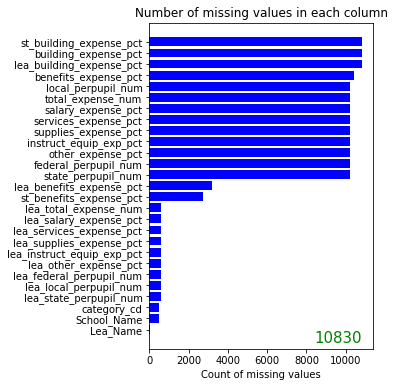

In [9]:
# CODE REFERENCE: https://www.kaggle.com/nikunjm88/carefully-dealing-with-missing-values

missing_df = funding.isnull().sum(axis=0).reset_index()
notmissing_df = max(funding.count())
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')


ind = np.arange(missing_df.shape[0])
width = 0.8
fig, ax = plt.subplots(figsize=(4,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
ax.text(0.95, 0.01, notmissing_df,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
plt.show()

The max count possible is shown in green in the lower right corner, and it appears we have several columns with a large percentage of missing values. Deeper inspection indicates these appear to be where schools did not input the data. Since we are dealing with an extremely large amount of columns across several input .csv files, percentage thresholding will be used to filter out columns with large amounts of missing data at a later stage in the pipeline. We will show a code snippet below of how this could be done. 

*********After: Removing columns with >= 60% of missing values******


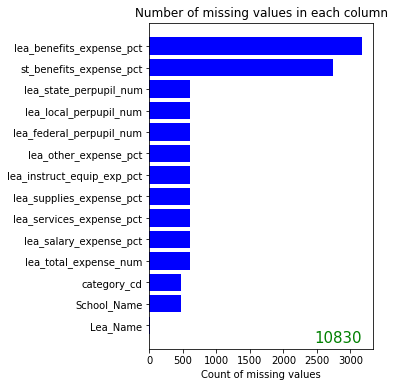

In [10]:
#Eliminate continuous columns with more than 60% of missing values
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

RecordCt = funding.shape[0]
missingValueLimit = RecordCt * 0.60
NullValueCounts = funding.isnull().sum()
NullValueCols = NullValueCounts[NullValueCounts >= missingValueLimit].index
funding1 = funding.drop(NullValueCols, axis=1)

#Review dataset contents after empty field drops
print('*********After: Removing columns with >= 60% of missing values******')
missing_df = funding1.isnull().sum(axis=0).reset_index()
notmissing_df = max(funding1.count())
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')


ind = np.arange(missing_df.shape[0])
width = 0.8
fig, ax = plt.subplots(figsize=(4,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
ax.text(0.95, 0.01, notmissing_df,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
plt.show()


As a further note, although some of these null values remain, they will later be removed and/or imputed based on combined data with other information. 

### Data Quality: Duplicate Data

Per the output below, no duplicate rows in the funding data. This is good. 

In [11]:
# examine duplicated rows
funding.loc[funding.duplicated(), :]


Empty DataFrame
Columns: [year, unit_code, Lea_Name, School_Name, State_Name, category_cd, total_expense_num, salary_expense_pct, benefits_expense_pct, services_expense_pct, supplies_expense_pct, instruct_equip_exp_pct, other_expense_pct, federal_perpupil_num, local_perpupil_num, state_perpupil_num, lea_total_expense_num, lea_salary_expense_pct, lea_benefits_expense_pct, lea_services_expense_pct, lea_supplies_expense_pct, lea_instruct_equip_exp_pct, lea_other_expense_pct, lea_federal_perpupil_num, lea_local_perpupil_num, lea_state_perpupil_num, st_total_expense_num, st_salary_expense_pct, st_benefits_expense_pct, st_services_expense_pct, st_supplies_expense_pct, st_instruct_equip_exp_pct, st_other_expense_pct, st_federal_perpupil_num, st_local_perpupil_num, st_state_perpupil_num, building_expense_pct, lea_building_expense_pct, st_building_expense_pct]
Index: []

[0 rows x 39 columns]

Let's check for duplicate unit_code (which should be only one per record as it is a 'primary-key'). 

In [12]:
# code REFERENCE: http://www.ritchieng.com/pandas-removing-duplicate-rows/
# examine duplicated unit_code
funding.loc[funding.unit_code.duplicated(), :]

year unit_code                                     Lea_Name  \
32954  2015    130322                      Cabarrus County Schools   
32955  2015    130331                      Cabarrus County Schools   
32956  2015    130340                      Cabarrus County Schools   
32957  2015    130319                      Cabarrus County Schools   
32958  2015    130326                      Cabarrus County Schools   
32959  2015    130333                      Cabarrus County Schools   
32960  2015    130338                      Cabarrus County Schools   
32961  2015    130345                      Cabarrus County Schools   
32962  2015    130312                      Cabarrus County Schools   
32963  2015    130325                      Cabarrus County Schools   
32964  2015    130318                      Cabarrus County Schools   
32965  2015    130346                      Cabarrus County Schools   
32966  2015    130320                      Cabarrus County Schools   
32967  2015    130324                      Cabarrus County Schools   
32968  2015    130328                      Cabarrus County Schools   
32969  2015    130314                      Cabarrus County Schools   
32970  2015    130344                      Cabarrus County Schools   
32971  2015    130311                      Cabarrus County Schools   
32972  2015    130307                      Cabarrus County Schools   
32973  2015    130316                      Cabarrus County Schools   
32974  2015    130342                      Cabarrus County Schools   
32975  2015    130330                      Cabarrus County Schools   
32976  2015    130329                      Cabarrus County Schools   
32977  2015    130327                      Cabarrus County Schools   
32978  2015    130355                      Cabarrus County Schools   
32979  2015    130350                      Cabarrus County Schools   
32980  2015    130313                      Cabarrus County Schools   
32981  2015    130309                      Cabarrus County Schools   
32982  2015    130304                      Cabarrus County Schools   
32983  2015    040330                         Anson County Schools   
32984  2015    130308                      Cabarrus County Schools   
32985  2015    130310                      Cabarrus County Schools   
32986  2015    130321                      Cabarrus County Schools   
32987  2015    130332                      Cabarrus County Schools   
32988  2015    040309                         Anson County Schools   
32989  2015    130315                      Cabarrus County Schools   
32990  2015    130336                      Cabarrus County Schools   
32991  2015    040305                         Anson County Schools   
32992  2015    130323                      Cabarrus County Schools   
32993  2015    130317                      Cabarrus County Schools   
32994  2015    010390                  Alamance-Burlington Schools   
32995  2015    040311                         Anson County Schools   
32996  2015    040308                         Anson County Schools   
32997  2015    010354                  Alamance-Burlington Schools   
32998  2015    040700                         Anson County Schools   
32999  2015    040316                         Anson County Schools   
33000  2015    010328                  Alamance-Burlington Schools   
33001  2015    040328                         Anson County Schools   
33002  2015    040306                         Anson County Schools   
33003  2015    010353                  Alamance-Burlington Schools   
33004  2015    040304                         Anson County Schools   
33005  2015    010347                  Alamance-Burlington Schools   
33006  2015    040324                         Anson County Schools   
33007  2015    010406                  Alamance-Burlington Schools   
33008  2015    010310                  Alamance-Burlington Schools   
33009  2015    010396                  Alamance-Burlington Schools   
33010  2015    01

<font color=red> A LOT of duplicates. This is not good. BUT... We forgot that we actually combined the years 2014-2017 in this ingest code so we need to filter down further to see if any duplicate unit_code occur during the same school year. </font> Let's try it again looking for year AND unit_code duplicates. Also had to use slightly different code as we couldnt figure out how to filter by two columns with the above code. 

In [13]:
# Code REFERENCE: https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
dupes = funding[funding.duplicated(subset=['year','unit_code'], keep=False)]
print (dupes)

       year unit_code                                     Lea_Name  \
36091  2016    76A000  Charter and Non-District Affiliated Schools   
36094  2016    76A000  Charter and Non-District Affiliated Schools   

                    School_Name               State_Name category_cd  \
36091  Uwharrie Charter Academy  State Of North Carolina           T   
36094  Uwharrie Charter Academy  State Of North Carolina           T   

       total_expense_num  salary_expense_pct  benefits_expense_pct  \
36091                NaN                 NaN                   NaN   
36094             7053.1               0.467                 0.175   

       services_expense_pct           ...             st_services_expense_pct  \
36091                   NaN           ...                                0.09   
36094                 0.219           ...                                0.09   

       st_supplies_expense_pct  st_instruct_equip_exp_pct  \
36091                    0.075                       0.0

Unit code 76A000 is a duplicate in year 2016. We need to remove the one with the NaNs. Will do so as follows using the total_expense_num field as the NA value. Also verify by looking for duplicates again vs. year and unit_code and this time the result is 0 rows, which is good! 

In [14]:
# code REFERENCE: https://github.com/jakemdrew/EducationDataNC/

#Delete duplicate / incomplete record in funding table
dupRecord = funding[(funding['unit_code'] == '76A000') & (funding['total_expense_num'].isna())].index
funding.drop(dupRecord, inplace=True)

dupes = funding[funding.duplicated(subset=['year','unit_code'], keep=False)]
print (dupes)

Empty DataFrame
Columns: [year, unit_code, Lea_Name, School_Name, State_Name, category_cd, total_expense_num, salary_expense_pct, benefits_expense_pct, services_expense_pct, supplies_expense_pct, instruct_equip_exp_pct, other_expense_pct, federal_perpupil_num, local_perpupil_num, state_perpupil_num, lea_total_expense_num, lea_salary_expense_pct, lea_benefits_expense_pct, lea_services_expense_pct, lea_supplies_expense_pct, lea_instruct_equip_exp_pct, lea_other_expense_pct, lea_federal_perpupil_num, lea_local_perpupil_num, lea_state_perpupil_num, st_total_expense_num, st_salary_expense_pct, st_benefits_expense_pct, st_services_expense_pct, st_supplies_expense_pct, st_instruct_equip_exp_pct, st_other_expense_pct, st_federal_perpupil_num, st_local_perpupil_num, st_state_perpupil_num, building_expense_pct, lea_building_expense_pct, st_building_expense_pct]
Index: []

[0 rows x 39 columns]


Next, we will look at columns that have the same value in every row. 

In [15]:
# code REFERENCE: https://github.com/jakemdrew/EducationDataNC/

# List any columns that have the same value in every row. 
UniqueValueCounts = funding.nunique(dropna=False)
SingleValueCols = UniqueValueCounts[UniqueValueCounts == 1].index
SingleValueCols

Index(['State_Name', 'st_other_expense_pct', 'building_expense_pct',
       'lea_building_expense_pct', 'st_building_expense_pct'],
      dtype='object')

In this instance, we will leave these 6 columns above that are all the same values in place due to merging with other data sets where they may become useful.

A quick look for columns that have different/unique value in every row, which was not the case here. 

In [16]:
# code REFERENCE: https://github.com/jakemdrew/EducationDataNC/

#List fields that have unique values in every row
schoolDataRecordCt = funding.shape[0]
UniqueValueCounts = funding.apply(pd.Series.nunique)
AllUniqueValueCols = UniqueValueCounts[UniqueValueCounts == schoolDataRecordCt].index
AllUniqueValueCols

Index([], dtype='object')

### Data Quality: Outliers

We will now jump back to our ML dataset to show a few classroom sizes and a way to visualize outliers. Assuming we don't really have a targeted dependent variable yet, we can use boxplots and/or distribution plots on each continuous variable to visualize possible outliers instead of scatterplot vs. the target variable. In the example below, we selected class sizes.  

[Text(0,0,'Math I_Size'),
 Text(0,0,'English II_Size'),
 Text(0,0,'Biology_Size')]

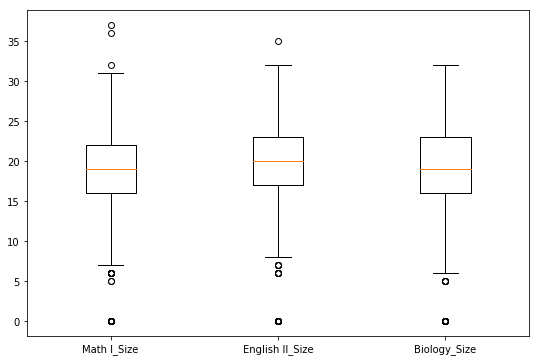

In [17]:
# code REFERENCE: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
# Box Plot Example

## combine these different collections into a list    
data_to_plot = [df_final['Math I_Size'], df_final['English II_Size'], df_final.Biology_Size]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## Custom x-axis labels
ax.set_xticklabels(['Math I_Size', 'English II_Size', 'Biology_Size'])


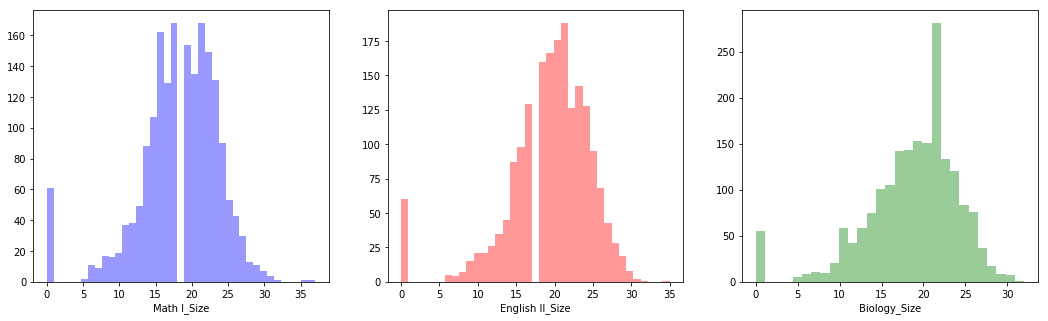

In [18]:
# Distribution Plot Example
# https://stackoverflow.com/questions/48204780/how-to-plot-multiple-figures-in-a-row-using-seaborn

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
plot1 = sns.distplot(df_final['Math I_Size'],     
                    kde=False,                        
                    color="b",
                    ax=ax1)

plot2 = sns.distplot(df_final['English II_Size'],     
                    kde=False,                        
                    color="r",
                    ax=ax2)

plot3 = sns.distplot(df_final.Biology_Size,     
                    kde=False,                        
                    color="g",
                    ax=ax3)
    


The output extreme values on the high side are of little concern since they are still reasonable. On the low side, however, it appears that the zeroes may have been fields that were not filled in. We will leave these as is for this iteration, but any classroom size specific research we will take this information into consideration and impute or remove row if needed.

## New Features

In order to enable binary response modeling, we needed to create a binary classification feature from existing data. To give us some flexibility during early EDA, and not knowing what we might end up using at the time, we created binary classification features with all the new columns named the same with binary_ prefix. 

We split these into 1 or 0 based on threshold determined to equalize class bias in the new columns using code below. 



In [21]:
# Code REFERENCE: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

# We are certain there's a better way to do this, but other options gave us various issues....

def f(row):
    if row['univ_college_courses'] > 0.05:
        val = 1
    else:
        val = 0
    return val
df_final['binary_univ_college_courses'] = df_final.apply(f, axis=1)

def f(row):
    if row['lea_univ_college_courses'] > 0.05:
        val = 1
    else:
        val = 0
    return val
df_final['binary_lea_univ_college_courses'] = df_final.apply(f, axis=1)

def f(row):
    if row['avg_daily_attend_pct'] > 0.95:
        val = 1
    else:
        val = 0
    return val
df_final['binary_avg_daily_attend_pct'] = df_final.apply(f, axis=1)

def f(row):
    if row['lea_avg_daily_attend_pct'] > 0.95:
        val = 1
    else:
        val = 0
    return val
df_final['binary_lea_avg_daily_attend_pct'] = df_final.apply(f, axis=1)

def f(row):
    if row['sat_avg_score_num'] > 999:
        val = 1
    else:
        val = 0
    return val
df_final['binary_sat_avg_score_num'] = df_final.apply(f, axis=1)

def f(row):
    if row['lea_sat_avg_score_num'] > 999:
        val = 1
    else:
        val = 0
    return val
df_final['binary_lea_sat_avg_score_num'] = df_final.apply(f, axis=1)


Now we have created new features, we will check them all for class bias. They all are fairly close to even split and we will use these threshold values above. 

In [22]:
#check for class bias based on our thresholds used.  
df_final['binary_univ_college_courses'].value_counts()

0    1085
1     819
Name: binary_univ_college_courses, dtype: int64

In [23]:
#check for class bias based on our thresholds used.  
df_final['binary_lea_univ_college_courses'].value_counts()

1    1069
0     835
Name: binary_lea_univ_college_courses, dtype: int64

In [24]:
#check for class bias based on our thresholds used.  
df_final['binary_avg_daily_attend_pct'].value_counts()

0    1201
1     703
Name: binary_avg_daily_attend_pct, dtype: int64

In [25]:
#check for class bias based on our thresholds used.  
df_final['binary_lea_avg_daily_attend_pct'].value_counts()

0    1154
1     750
Name: binary_lea_avg_daily_attend_pct, dtype: int64

In [26]:
#check for class bias based on our thresholds used.  
df_final['binary_sat_avg_score_num'].value_counts()

0    1075
1     829
Name: binary_sat_avg_score_num, dtype: int64

In [27]:
#check for class bias based on our thresholds used.  
df_final['binary_lea_sat_avg_score_num'].value_counts()

0    1013
1     891
Name: binary_lea_sat_avg_score_num, dtype: int64

Let's also discretize the SPG Score into groups of low medium high.<br> 
We will use .describe and threshold the categories at low < 25% <= medium <= 75%.< high 

In [28]:
df_final['SPG Score'].describe()

count    1904.000000
mean       70.993697
std        12.642627
min         9.000000
25%        62.000000
50%        70.000000
75%        80.000000
max       100.000000
Name: SPG Score, dtype: float64

In [29]:
# code REFERENCE: https://github.com/eclarson/DataMiningNotebooks
# this creates a new variable
df_final['SPGPercentGroup'] = pd.cut(df_final['SPG Score'],[0,62,80,100],3,labels=['low','medium','high']) 
df_final.SPGPercentGroup.describe()


count       1904
unique         3
top       medium
freq         939
Name: SPGPercentGroup, dtype: object

There are already almost 300 features in this set. We certainly can find and add more feature interactions/stacking during future iterations, but at this time we will limit the feature adds to the ones listed above.  

## Simple Statistics

The following are the attributes we selected and the future visualizations are all based on them. 

In [30]:
df_statistics = df_final[['year','nbpts_num','lea_local_perpupil_num','SPG Score','sat_avg_score_num', 'lea_total_expense_num',
                          'avg_daily_attend_pct', 'flicensed_teach_pct','lea_supplies_expense_pct','stud_internet_comp_num',
                          'crime_per_c_num','univ_college_courses','sat_participation_pct','ap_pct_3_or_above',
                          'EVAAS Growth Score','ACTMath_ACTBenchmark_All','ACTScience_ACTBenchmark_All',
                          'ACTWriting_ACTBenchmark_All','ap_participation_pct',
                          'F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct',
                          'GraduationRate_4yr_Female','GraduationRate_4yr_Male',
                          'GraduationRate_5yr_All','GraduationRate_5yr_Female','GraduationRate_5yr_Male',                       
                          'GraduationRate_4yr_Asian','GraduationRate_5yr_Asian',
                          'GraduationRate_4yr_Black','GraduationRate_5yr_Black',
                          'GraduationRate_4yr_Hispanic','GraduationRate_5yr_Hispanic',
                          'GraduationRate_4yr_TwoorMoreRaces','GraduationRate_5yr_TwoorMoreRaces',
                          'GraduationRate_4yr_White','GraduationRate_5yr_White',
                          'GraduationRate_4yr_EDS','GraduationRate_5yr_EDS',
                          'GraduationRate_4yr_LEP','GraduationRate_5yr_LEP',
                          'GraduationRate_4yr_SWD','GraduationRate_5yr_SWD',
                          'GraduationRate_4yr_AIG','GraduationRate_5yr_AIG']]


#### Range, Mean, Stamdard Deviation, Counts, and a few other helpful statistics using .describe

In [31]:
df_statistics.describe(include='all').transpose()

count         mean          std       min  \
year                               1904.0  2015.494748     1.115492  2014.000   
nbpts_num                          1904.0     7.809874     7.052657     0.000   
lea_local_perpupil_num             1904.0  2069.054207   694.465623   740.520   
SPG Score                          1904.0    70.993697    12.642627     9.000   
sat_avg_score_num                  1904.0   938.730042   230.158463     0.000   
lea_total_expense_num              1904.0  9093.345021  1204.493613  7282.190   
avg_daily_attend_pct               1904.0     0.944864     0.023414     0.803   
flicensed_teach_pct                1904.0     0.905628     0.092297     0.000   
lea_supplies_expense_pct           1904.0     0.081555     0.015932     0.028   
stud_internet_comp_num             1904.0     1.325205     1.597800     0.000   
crime_per_c_num                    1904.0     1.066723     0.920475     0.000   
univ_college_courses               1904.0     0.173449     0.307820     0.000   
sat_participation_pct              1904.0     0.443686     0.201746     0.000   
ap_pct_3_or_above                  1904.0     0.333414     0.255739     0.000   
EVAAS Growth Score                 1904.0    75.616649    17.601693     0.000   
ACTMath_ACTBenchmark_All           1904.0    26.284926    17.160495     0.000   
ACTScience_ACTBenchmark_All        1904.0    20.794118    14.545594     0.000   
ACTWriting_ACTBenchmark_All        1904.0    27.433718    17.276635     0.000   
ap_participation_pct               1904.0     0.103708     0.108038     0.000   
F_Female_ENROLL_sch_pct            1904.0    40.513978    21.467421     0.000   
M_Male_ENROLL_sch_pct              1904.0    31.998886    19.458767     0.000   
GraduationRate_4yr_Female          1904.0    88.097952    19.964697     0.000   
GraduationRate_4yr_Male            1904.0    82.644328    21.456085     0.000   
GraduationRate_5yr_All             1904.0    85.817857    20.702054     0.000   
GraduationRate_5yr_Female          1904.0    86.829464    22.743935     0.000   
GraduationRate_5yr_Male            1904.0    82.027731    23.832690     0.000   
GraduationRate_4yr_Asian           1904.0    18.708824    37.739613     0.000   
GraduationRate_5yr_Asian           1904.0    18.579254    37.807311     0.000   
GraduationRate_4yr_Black           1904.0    67.403571    39.164546     0.000   
GraduationRate_5yr_Black           1904.0    67.302101    39.741218     0.000   
GraduationRate_4yr_Hispanic        1904.0    59.787868    39.942088     0.000   
GraduationRate_5yr_Hispanic        1904.0    57.991649    41.302070     0.000   
GraduationRate_4yr_TwoorMoreRaces  1904.0    35.844748    43.622637     0.000   
GraduationRate_5yr_TwoorMoreRaces  1904.0    34.631303    43.575661     0.000   
GraduationRate_4yr_White           1904.0    82.471796    25.713142     0.000   
GraduationRate_5yr_White           1904.0    81.427363    27.348761     0.000   
GraduationRate_4yr_EDS             1904.0    80.183876    23.370057     0.000   
GraduationRate_5yr_EDS             1904.0    79.614916    25.226727     0.000   
GraduationRate_4yr_LEP             1904.0    13.293225    26.730221     0.000   
GraduationRate_5yr_LEP             1904.0    13.899370    27.878031     0.000   
GraduationRate_4yr_SWD             1904.0    52.713708    34.806839     0.000   
GraduationRate_5yr_SWD             1904.0    53.835504    35.500516     0.000   
GraduationRate_4yr_AIG             1904.0    83.659926    35.912459     0.000   
GraduationRate_5yr_AIG             1904.0    81.161870    38.116798     0.000   

                                           25%          50%          75%  \
year                               2014.750000  2015.000000  2016.000000   
nbpts_num                             2.000000     6.000000    11.000000   
lea_local_perpupil_num             1654.160000  1933.510000  2352.270000   
SPG Score                            62.000000    70.000000    80.000000   
sat_avg_sc

#### Variance

In [32]:
for column in df_statistics: 
    var = np.var(df_statistics[column])
    print ("The variance of {} is {}".format([column], [var]))

The variance of ['year'] is [1.243669894428354]
The variance of ['nbpts_num'] is [49.713852084951505]
The variance of ['lea_local_perpupil_num'] is [482029.2015425428]
The variance of ['SPG Score'] is [159.752061118565]
The variance of ['sat_avg_score_num'] is [52945.09624033435]
The variance of ['lea_total_expense_num'] is [1450042.8869505173]
The variance of ['avg_daily_attend_pct'] is [0.0005479231976798058]
The variance of ['flicensed_teach_pct'] is [0.0085142283251536]
The variance of ['lea_supplies_expense_pct'] is [0.00025370599241534674]
The variance of ['stud_internet_comp_num'] is [2.551623592497656]
The variance of ['crime_per_c_num'] is [0.8468301205776388]
The variance of ['univ_college_courses'] is [0.0947036178565766]
The variance of ['sat_participation_pct'] is [0.040679926566582494]
The variance of ['ap_pct_3_or_above'] is [0.06536786232875522]
The variance of ['EVAAS Growth Score'] is [309.65688141892747]
The variance of ['ACTMath_ACTBenchmark_All'] is [294.3279398055

#### Mode

In [33]:
for column in df_statistics: 
    mode = stats.mode(df_statistics[column])
    print ("The modal value of  {} is {} with a count of {}".format([column], mode.mode[0], mode.count[0]))

The modal value of  ['year'] is 2015 with a count of 480
The modal value of  ['nbpts_num'] is 1.0 with a count of 193
The modal value of  ['lea_local_perpupil_num'] is 2325.66 with a count of 27
The modal value of  ['SPG Score'] is 69.0 with a count of 76
The modal value of  ['sat_avg_score_num'] is 0.0 with a count of 91
The modal value of  ['lea_total_expense_num'] is 8381.36 with a count of 27
The modal value of  ['avg_daily_attend_pct'] is 0.943 with a count of 47
The modal value of  ['flicensed_teach_pct'] is 1.0 with a count of 287
The modal value of  ['lea_supplies_expense_pct'] is 0.073 with a count of 79
The modal value of  ['stud_internet_comp_num'] is 0.0 with a count of 28
The modal value of  ['crime_per_c_num'] is 0.0 with a count of 345
The modal value of  ['univ_college_courses'] is 0.0 with a count of 475
The modal value of  ['sat_participation_pct'] is 0.0 with a count of 94
The modal value of  ['ap_pct_3_or_above'] is 0.0 with a count of 432
The modal value of  ['EVAA

There are few interesting attributes we noticed. 

**1. Graduation rate of females and males:**

The simple statistics is showing that the mean of 4-year high school female graduation rate is higher than those of males and so is the 5-year high school graduation rate. 

**2. College enrollment percentage of females and males:**

The mean of college enrollment percentage is showing that percentage of females are higher than males.  

**3. Average SAT score from 2014 to 2017: ** 

The average SAT score has a big range. The potential reason might be that for different years, the average SAT varies.  

## Visualize Attributes

#### 1. ACTMath_ACTBenchmark_All, ACTScience_ACTBenchmark_All, ACTWriting_ACTBenchmark_All

From the boxplots, not much differences of ACT benchmarking meeting rates between 4 years for subject Math, Science and Reading.

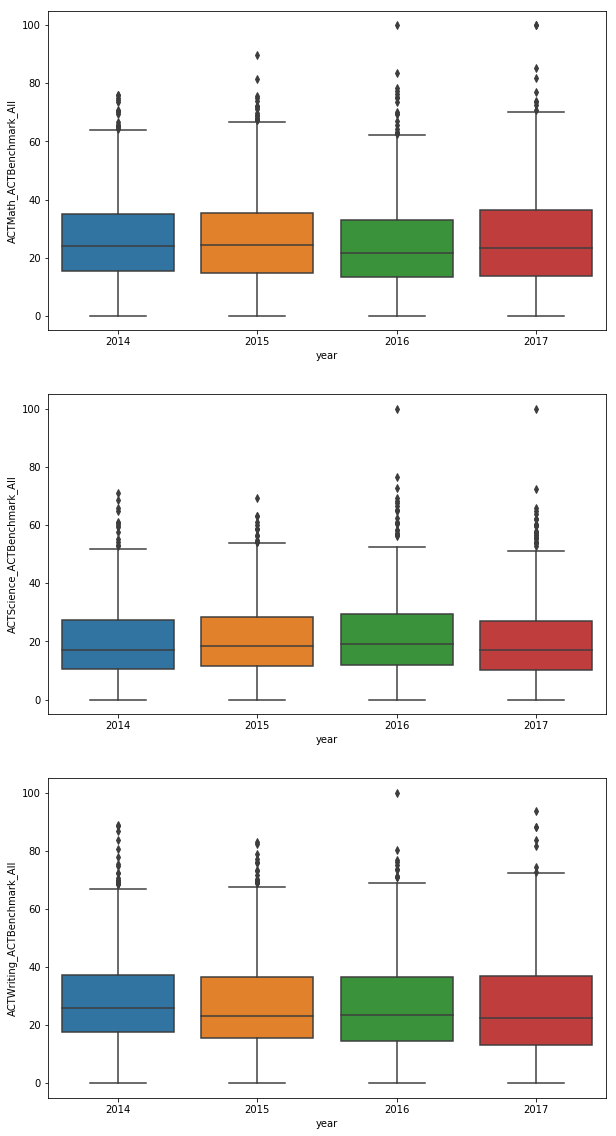

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,20))
sns.boxplot(x='year',y='ACTMath_ACTBenchmark_All', data = df_final,ax = ax1)
#sns.swarmplot(x="year", y="ACTMath_ACTBenchmark_All", data=df_final, ax=ax1)
sns.boxplot(x='year',y='ACTScience_ACTBenchmark_All', data = df_final,ax = ax2)
sns.boxplot(x='year',y='ACTWriting_ACTBenchmark_All', data = df_final,ax = ax3)
#df_final.boxplot(column='F_Female_ENROLL_sch_pct',by = 'year')

#### 2. sat_participation_pct, ap_participation_pct

SAT participation percentage keeps dropping from year 2014 to year 2017. 

AP participation percentage is about the same during the years.

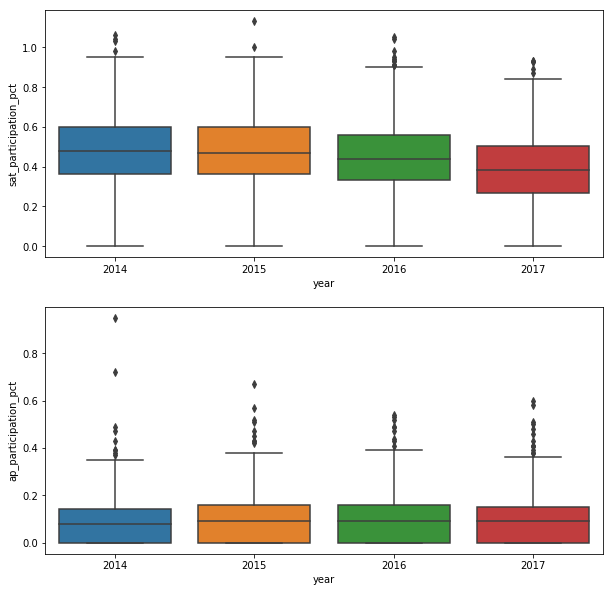

In [35]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
sns.boxplot(x='year',y='sat_participation_pct', data = df_final, ax=ax1)
sns.boxplot(x='year',y='ap_participation_pct', data = df_final, ax=ax2)

# fig, axes = plt.subplots(2,2,figsize=(10,10))
# x=df_final.sat_participation_pct[df_final.year==2014]
# sns.distplot(x, hist=True, rug=True, ax=axes[0,0]);
# x=df_final.sat_participation_pct[df_final.year==2015]
# sns.distplot(x, hist=True, rug=True,ax=axes[0,1]);
# x=df_final.sat_participation_pct[df_final.year==2016]
# sns.distplot(x, hist=True, rug=True,ax=axes[1,0]);
# x=df_final.sat_participation_pct[df_final.year==2017]
# sns.distplot(x, hist=True, rug=True,ax=axes[1,1]);

** 3. Graduation rates of difference genders**

Regardless of how long the high school program is, a 4-year or an extended 5-year program, female graduation rate is higher than the male graduation rate from 2014 to 2017. A kernel density plot is provided to show the difference between them. As the plot shown, again, female graduation rate is slightly higher than those of males.

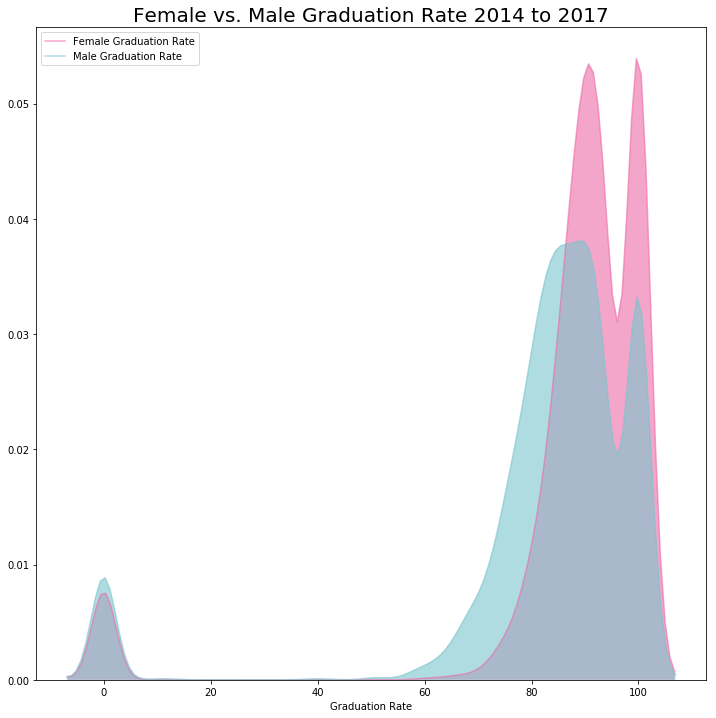

In [36]:
fig, ax= plt.subplots(figsize=(12,12))

ax.set_title('Female vs. Male Graduation Rate 2014 to 2017',fontsize=20)
ax.set_xlabel('Graduation Rate')

df_grad_rate = df_final[['year','GraduationRate_4yr_Female','GraduationRate_4yr_Male',
                        'GraduationRate_5yr_Female','GraduationRate_5yr_Male']]

female_grad = df_grad_rate.GraduationRate_4yr_Female
sns.kdeplot(female_grad,shade=True,label='Female Graduation Rate',color='#EE6AA7',alpha=0.6)
male_grad = df_grad_rate.GraduationRate_4yr_Male
sns.kdeplot(male_grad,shade=True,label='Male Graduation Rate',color ='#7AC5CD',alpha=0.6)
plt.legend()


**4. College enrollment percentage of different genders **

As the graduation rate is showing evidence that females are more likely to graduate than males, the percentage of college enrollment is showing the similar pattern.

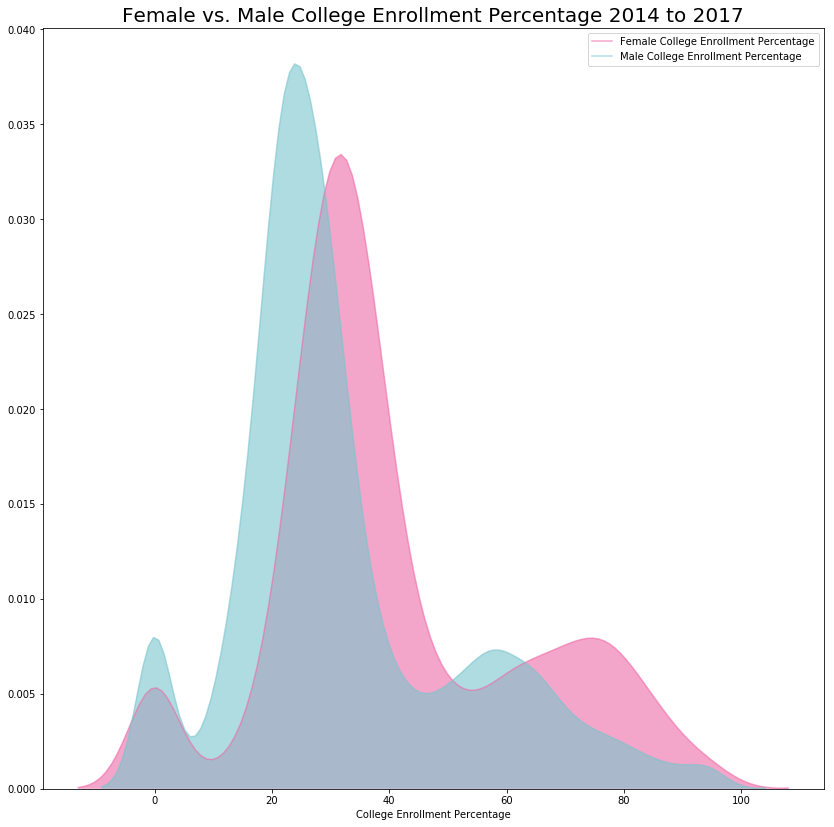

In [37]:
fig, ax= plt.subplots(figsize=(14,14))

ax.set_title('Female vs. Male College Enrollment Percentage 2014 to 2017',fontsize=20)
ax.set_xlabel('College Enrollment Percentage')

df_enroll_rate = df_final[['year','F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct']]

female_enroll = df_enroll_rate.F_Female_ENROLL_sch_pct
sns.kdeplot(female_enroll,shade=True,label='Female College Enrollment Percentage',color='#EE6AA7',alpha=0.6)
male_enroll = df_enroll_rate.M_Male_ENROLL_sch_pct
sns.kdeplot(male_enroll,shade=True,label='Male College Enrollment Percentage',color ='#7AC5CD',alpha=0.6)

plt.legend()

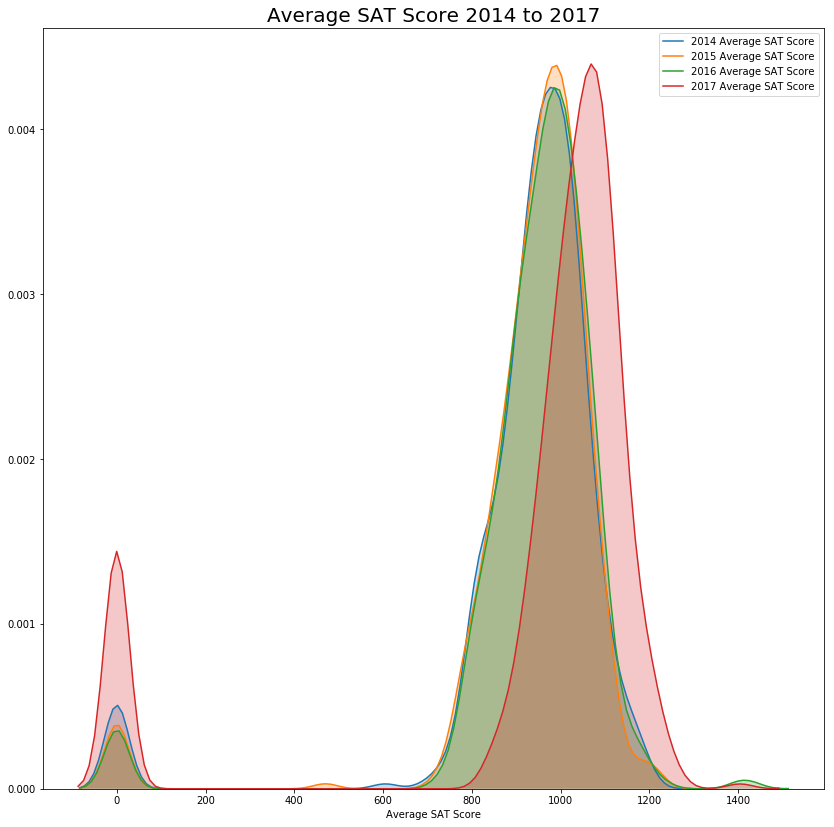

In [38]:
fig, ax= plt.subplots(figsize=(14,14))

ax.set_title('Average SAT Score 2014 to 2017',fontsize=20)
ax.set_xlabel('Average SAT Score')

SAT2014 = df_statistics.sat_avg_score_num[df_statistics.year==2014]
sns.kdeplot(SAT2014, label = "2014 Average SAT Score",shade=True)

SAT2015 = df_statistics.sat_avg_score_num[df_statistics.year==2015]
sns.kdeplot(SAT2015, label = "2015 Average SAT Score",shade=True)

SAT2016 = df_statistics.sat_avg_score_num[df_statistics.year==2016]
sns.kdeplot(SAT2016, label = "2016 Average SAT Score",shade=True)

SAT2017 = df_statistics.sat_avg_score_num[df_statistics.year==2017]
sns.kdeplot(SAT2017, label = "2017 Average SAT Score",shade=True)

plt.legend()

## Explore Joint Attributes

**1. Joint Attributes - Relationships between Female/Male college enrollment rate and SPG score, sat score and ACT score group by years**

*From pair plot, we can see that there is positive linear relationship between **college enrollment rate(Both Female and Male)** with **SPG score**, **sat score** and **ACT score**. **Female enrollment rate** is also positively linear related to **male enrollment rate**.*

In [39]:
#lea_total_expense_num,
#SPG Score, -- see clustering
#EVAAS Growth Score, -- see mild clustering
#ACTMath_ACTBenchmark_All,sat_avg_score_num,ap_participation_pct
#sat_participation_pct,avg_daily_attend_pct,flicensed_teach_pct
#F_Female_ENROLL_sch_pct,F_Male_ENROLL_sch_pct

# Prepare data subset for plotting. Chooseing related Variables

df_imputed_jitter = df_final[['F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct',
                              'SPG Score','sat_avg_score_num',
                              'ACTMath_ACTBenchmark_All','ACTScience_ACTBenchmark_All','ACTWriting_ACTBenchmark_All',
                              'year']]

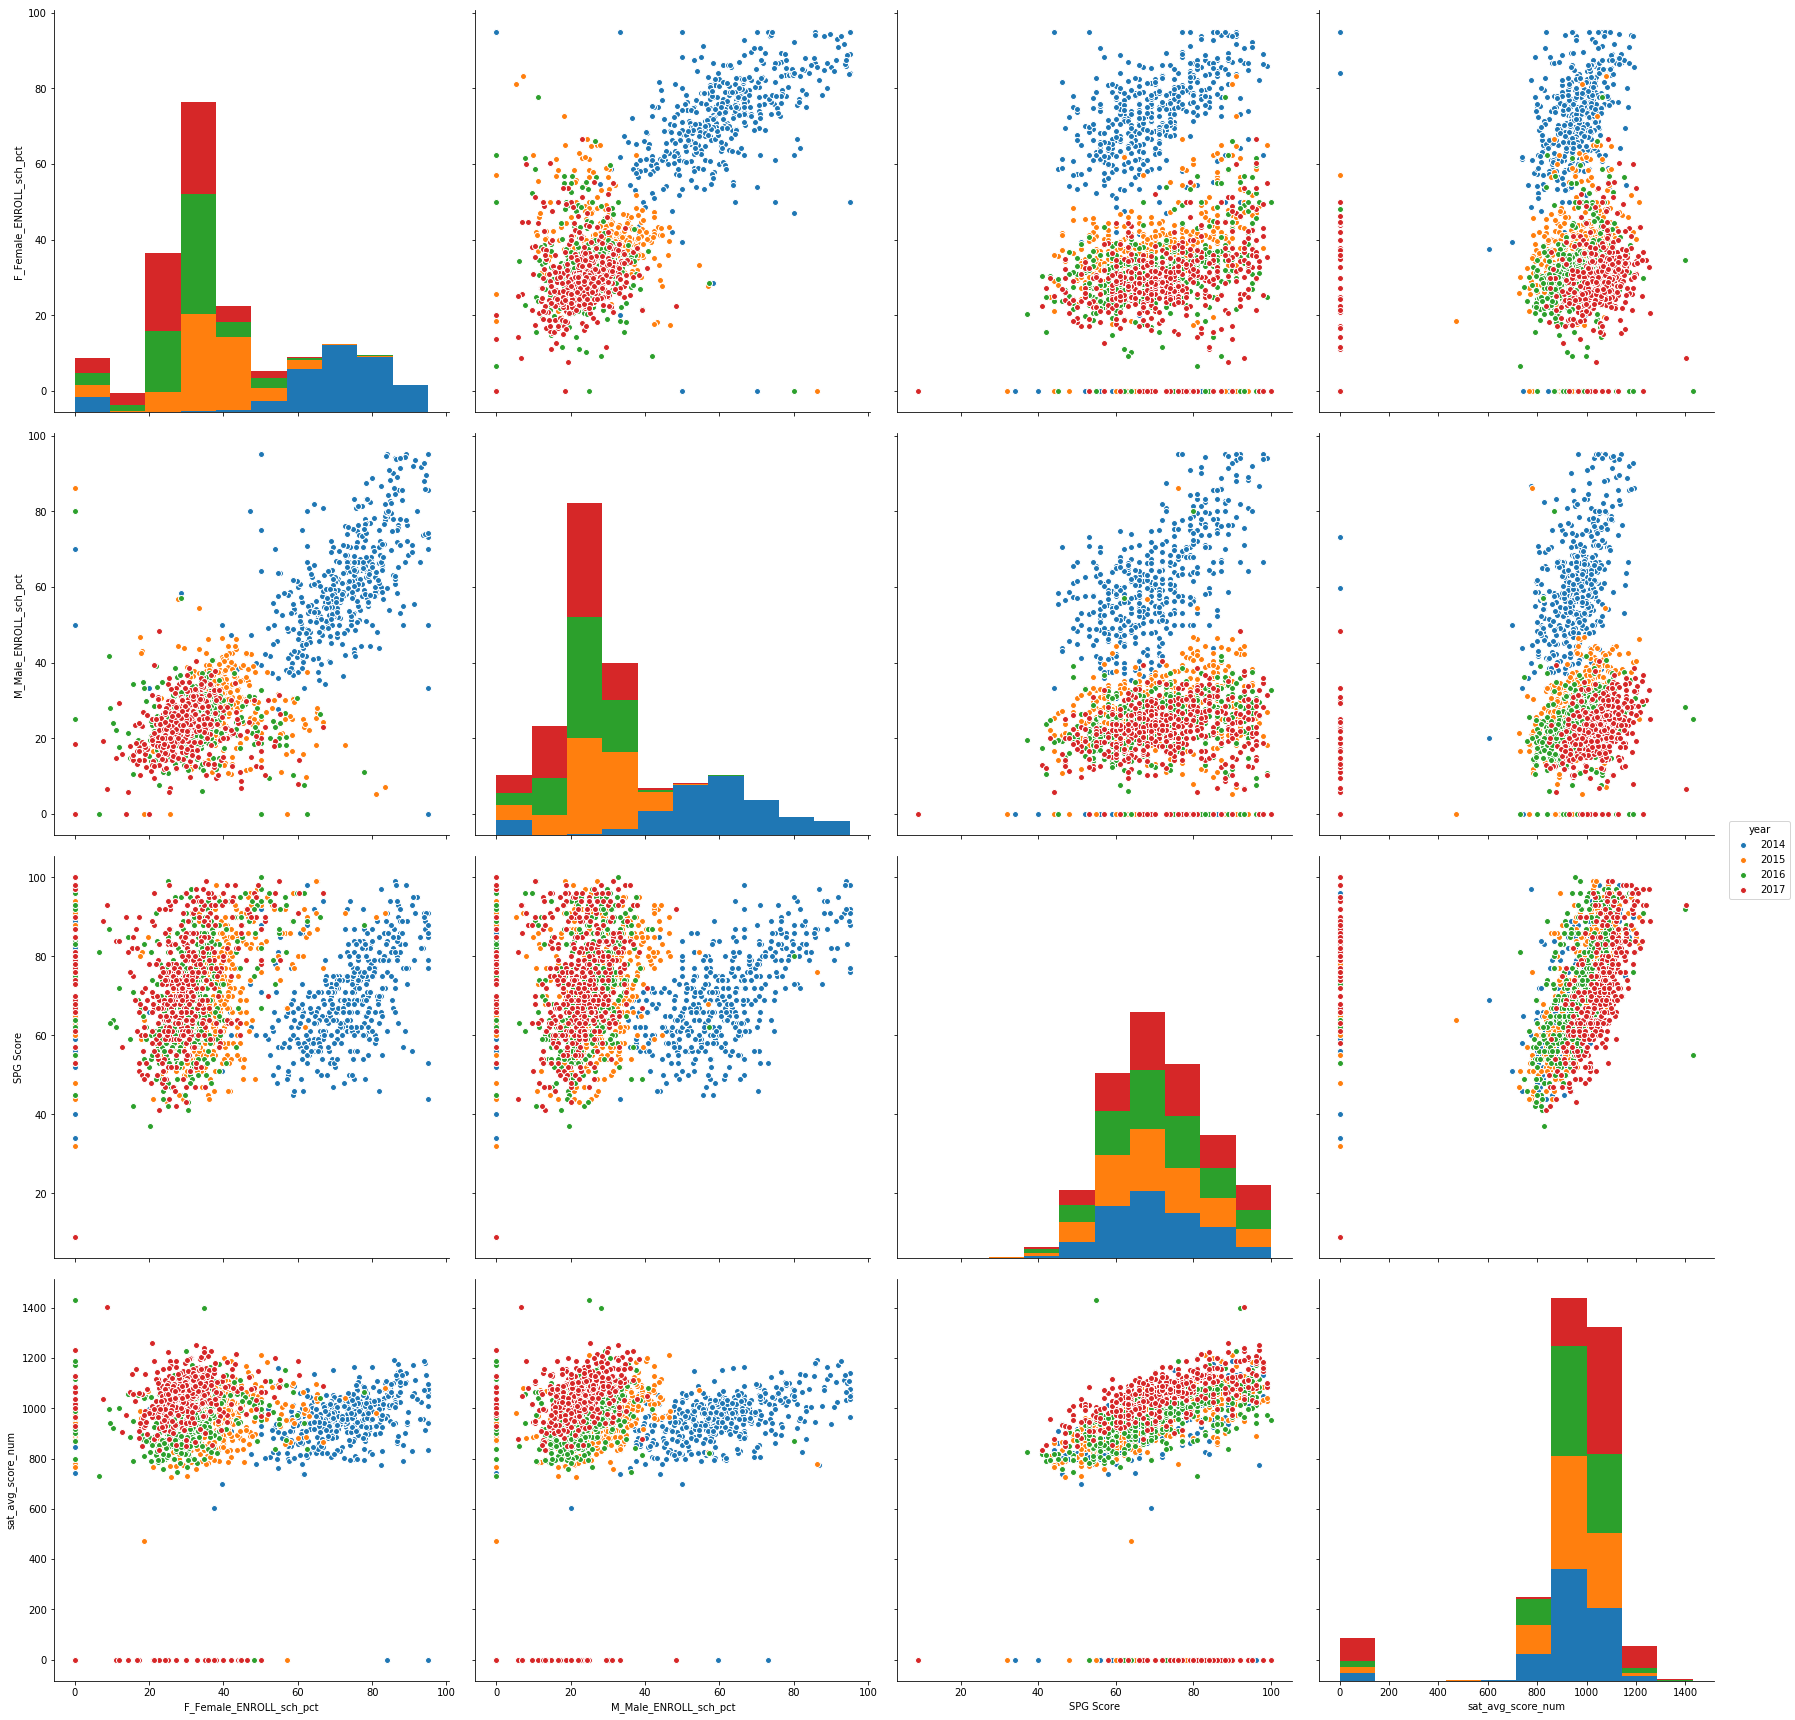

In [40]:
sns.pairplot(df_imputed_jitter, vars=['F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct',
                                     'SPG Score','sat_avg_score_num'], hue= 'year',size=6)

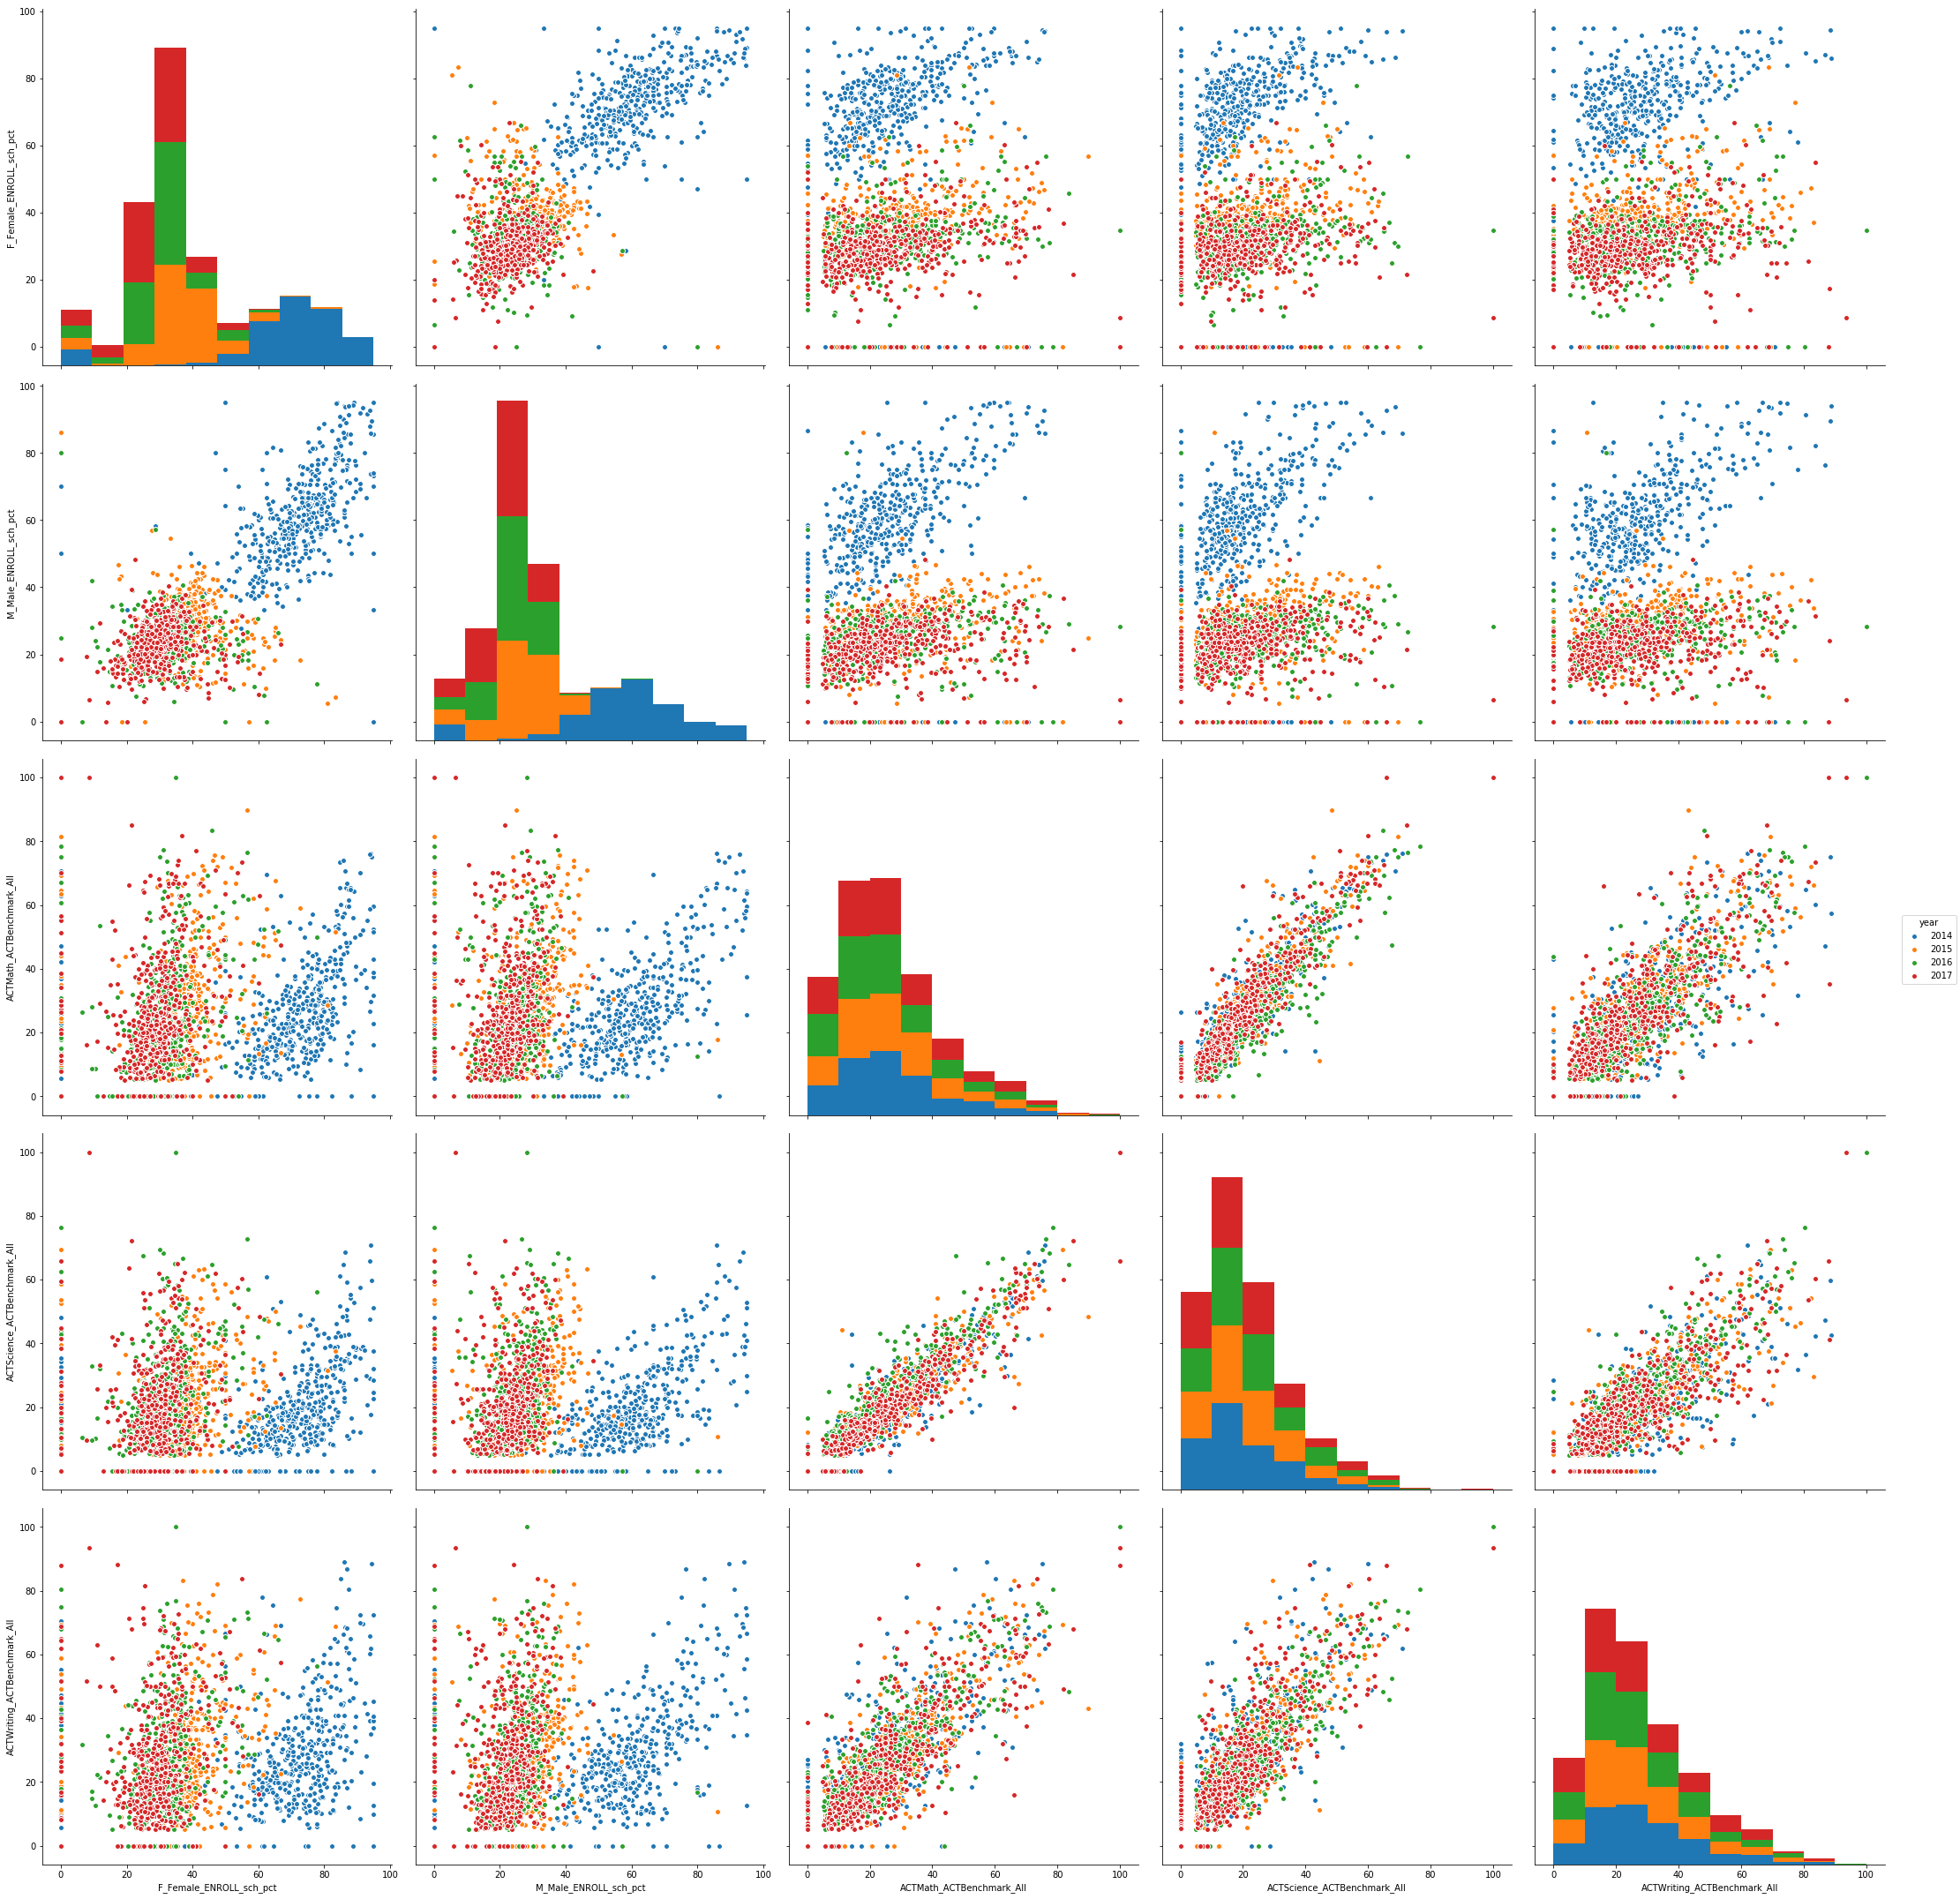

In [41]:
sns.pairplot(df_imputed_jitter, vars=['F_Female_ENROLL_sch_pct','M_Male_ENROLL_sch_pct',
                                     'ACTMath_ACTBenchmark_All','ACTScience_ACTBenchmark_All','ACTWriting_ACTBenchmark_All'],
             hue= 'year',size=6)

**2. Joint Attributes - From above Female/Male college enrollment rate vs SPG/sat/ACT score **

we can see an interesting fact that 2014 enrollment rate is strangly higher than the other years given the same score range.

Plot all enrollment rate data of each year and gender to see it more clearly.*


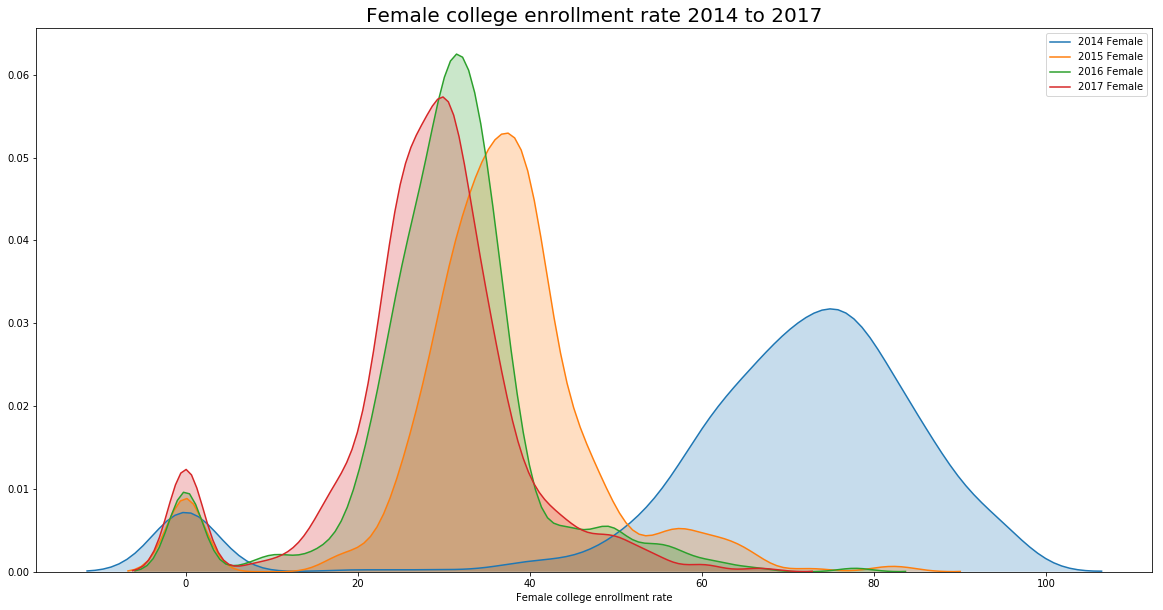

In [42]:
a4_dims = (20, 10)
fig, ax= plt.subplots(figsize=a4_dims)
ax.set_title('Female college enrollment rate 2014 to 2017',fontsize=20)
ax.set_xlabel('Female college enrollment rate')

# FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2014]
# MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2014]
# sns.kdeplot(FemaleEnoll, MaleEnoll,label = "2014",shade = True,shade_lowest=False)

# FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2015]
# MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2015]
# sns.kdeplot(FemaleEnoll, MaleEnoll,label = "2015",cmap="Reds",shade_lowest=False,shade = True)

# FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2016]
# MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2016]
# sns.kdeplot(FemaleEnoll, MaleEnoll,label = "2016 ",cmap="Blues",shade_lowest=False,shade = True)

# FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2017]
# MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2017]
# sns.kdeplot(FemaleEnoll, MaleEnoll,label = "2017 ",cmap="Purples",shade_lowest=False,shade=True)

FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2014]
sns.kdeplot(FemaleEnoll, label = "2014 Female",shade=True)
FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2015]
sns.kdeplot(FemaleEnoll, label = "2015 Female",shade=True)
FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2016]
sns.kdeplot(FemaleEnoll, label = "2016 Female",shade=True)
FemaleEnoll = df_imputed_jitter.F_Female_ENROLL_sch_pct[df_imputed_jitter.year==2017]
sns.kdeplot(FemaleEnoll, label = "2017 Female",shade=True)

plt.legend()

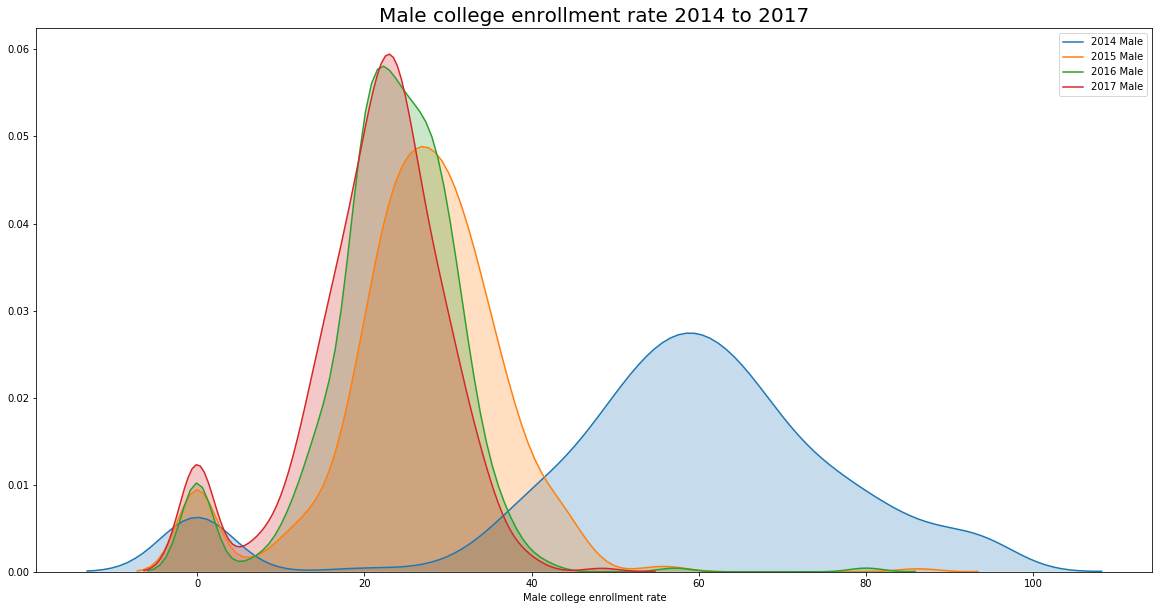

In [43]:
a4_dims = (20, 10)
fig, ax= plt.subplots(figsize=a4_dims)
ax.set_title('Male college enrollment rate 2014 to 2017',fontsize=20)
ax.set_xlabel('Male college enrollment rate')

MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2014]
sns.kdeplot(MaleEnoll, label = "2014 Male",shade=True)
MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2015]
sns.kdeplot(MaleEnoll, label = "2015 Male",shade=True)
MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2016]
sns.kdeplot(MaleEnoll, label = "2016 Male",shade=True)
MaleEnoll = df_imputed_jitter.M_Male_ENROLL_sch_pct[df_imputed_jitter.year==2017]
sns.kdeplot(MaleEnoll, label = "2017 Male",shade=True)
plt.legend()


** 3. Joint Attributes - The relationship visualization between average number of National Board Certified staff, local expense per pupil at LEA level and Graduation Rate of females, males from 2014 to 2017. **

There is an obvious common pattern in the following plots. No matter whether the high school program is extended or not, as the number of National Board Certified staff is going higher, both females and males gradutation rate is getting higher. As you can see, they form a triangle shape. Same pattern applies to the relationship between the local expense per pupil at LEA level and the graduation rate for both genders.



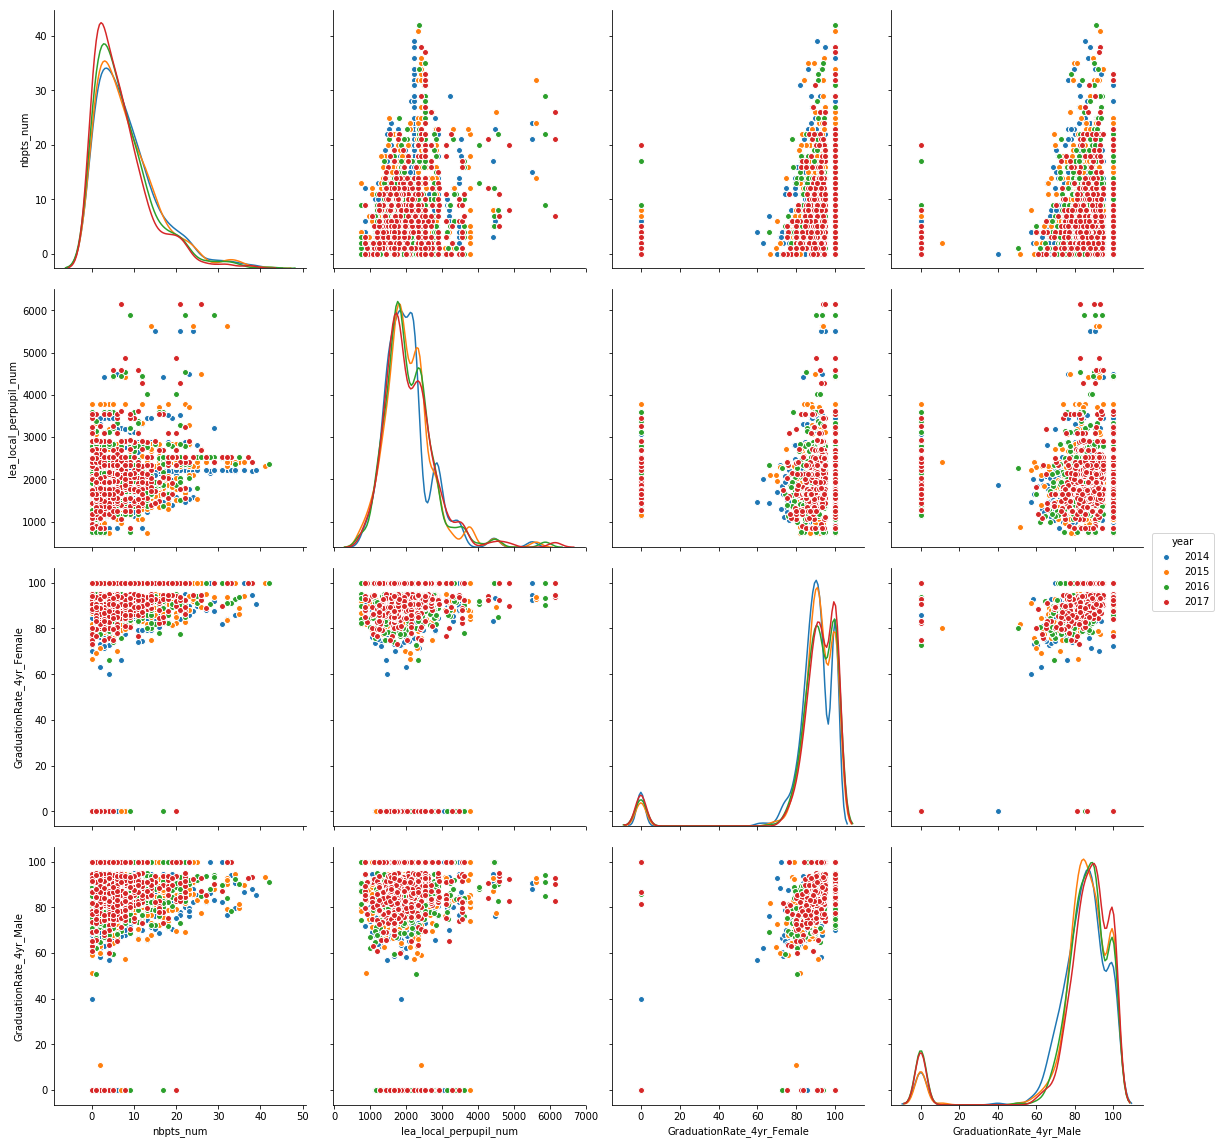

In [44]:
df_4yrGradRate = df_final[['year','lea_local_perpupil_num','nbpts_num','GraduationRate_4yr_Female','GraduationRate_4yr_Male']]
df_5yrGradRate = df_final[['year','lea_local_perpupil_num','nbpts_num','GraduationRate_5yr_Female','GraduationRate_5yr_Male']]

#pairplot, but cant tell much
sns.pairplot(df_4yrGradRate,
             vars = ['nbpts_num','lea_local_perpupil_num','GraduationRate_4yr_Female','GraduationRate_4yr_Male'],
             diag_kind = 'kde',hue='year',size=4)

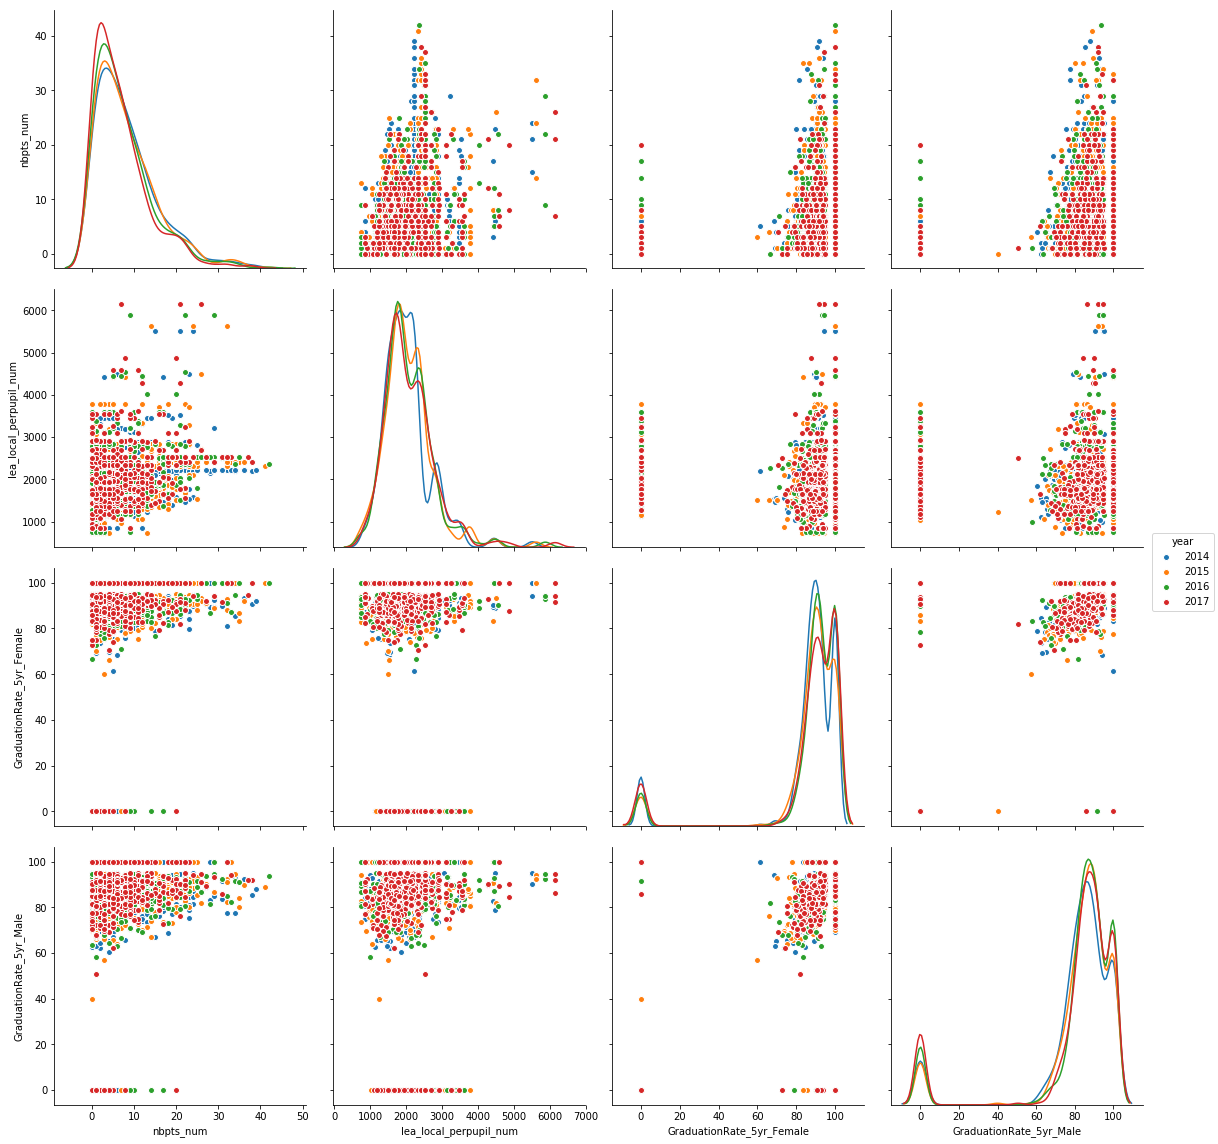

In [45]:
sns.pairplot(df_5yrGradRate,
             vars = ['nbpts_num','lea_local_perpupil_num','GraduationRate_5yr_Female','GraduationRate_5yr_Male'],
             diag_kind = 'kde',hue='year',size=4)

** 4. Joint Attributes-The correlation map between the following variables: nbpts_num, SPG Score, lea_local_perpupil_num,sat_avg_score_num, lea_total_expense_num,avg_daily_attend_pct,sat_avg_score_num,lea_total_expense_num,avg_daily_attend_pct, univ_college_courses.**

As you can see there are varialbes that are positively correlated with correlation coefficient more than 0.5. 

**Average number of National Board Certified staff** and **the percentage of AP Exams with Scores of 3 or Above at the
School Level** are positively correlated with a coefficient of 0.58.

The **SPG score** of schools are positively correlated with **average daily attend percentage**, the correlation coefficient is 0.62.

The **college enrollment courses** are positively correlated with **average daily attend percentage**, the correlation coefficient is 0.51.

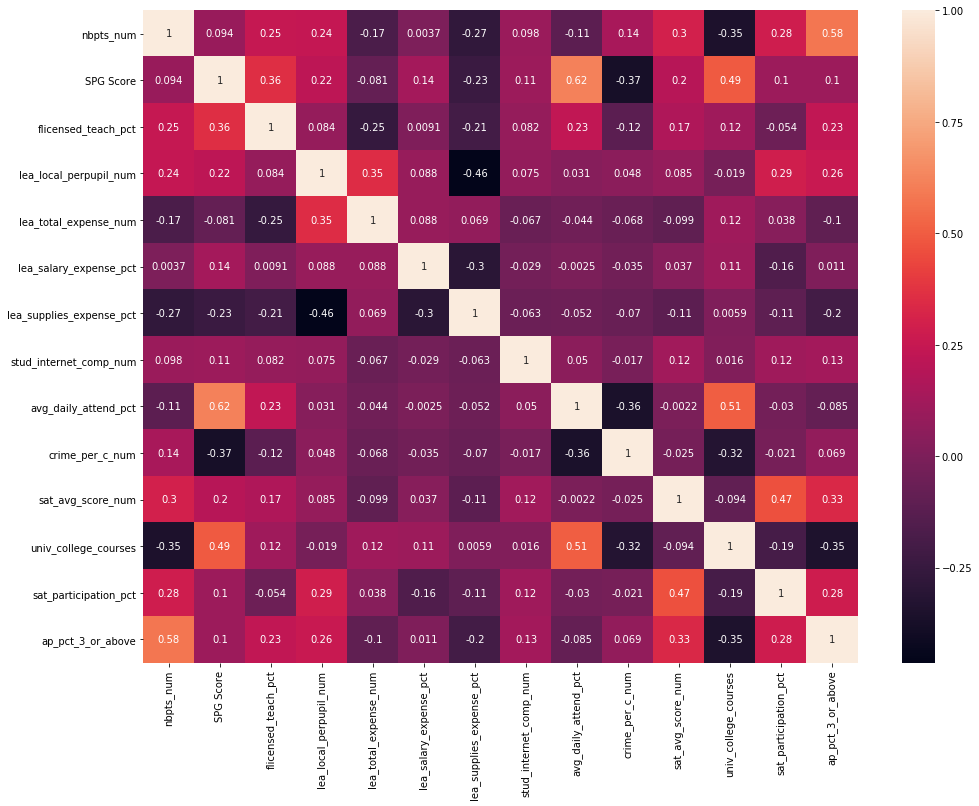

In [46]:
df_heat = df_final[['nbpts_num','SPG Score', 'flicensed_teach_pct',#school nad teacher characters
                    'lea_local_perpupil_num','lea_total_expense_num','lea_salary_expense_pct', #funding
                    'lea_supplies_expense_pct','stud_internet_comp_num',#funding
                    'avg_daily_attend_pct','crime_per_c_num', #environment
                    'sat_avg_score_num','univ_college_courses','sat_participation_pct','ap_pct_3_or_above']]
df_heat_corr = df_heat.corr()
plt.figure(figsize = (16,12))
sns.heatmap(df_heat_corr,annot=True)

** 5. Joint Attributes -- Relationships between Race, Graduation Rates, and Year***

*From the heatmap, we can see that there is moderate correlation(s) between **Asian graduation rates and graduation rates for those who identify as Two or More Races**, and **Hispanic graduation rates and those who identify as Two or More Races**. Some interesting insights to note are the extremely low or lackthereof correlations between **year** and **graduation rates for all race categories**. Furthermore, the heatmap reveals little to no correlation between **White graduation rates and graduation rates of other racial categories**, although there does seem to be a moderately low correlation between **White graduation rates and Hispanic graduation rates**.*



In [47]:
# Create a subset of data containing year, race, and graduation rates
# Descriptive statistics and exploration of relationships (possible correlations)
df_4yrGradRate_Race_subset =df_final[['year','GraduationRate_4yr_Asian','GraduationRate_4yr_Black','GraduationRate_4yr_Hispanic',
                                     'GraduationRate_4yr_TwoorMoreRaces','GraduationRate_4yr_White']]
pd.DataFrame(df_4yrGradRate_Race_subset)

df_4yrGradRate_Race_subset2014 = df_4yrGradRate_Race_subset.loc[df_4yrGradRate_Race_subset['year'] == 2014]
df_4yrGradRate_Race_subset2014 = df_4yrGradRate_Race_subset2014.drop(['year'], axis=1)


df_4yrGradRate_Race_subset2015 = df_4yrGradRate_Race_subset.loc[df_4yrGradRate_Race_subset['year'] == 2015]
df_4yrGradRate_Race_subset2015 = df_4yrGradRate_Race_subset2015.drop(['year'], axis=1)


df_4yrGradRate_Race_subset2016 = df_4yrGradRate_Race_subset.loc[df_4yrGradRate_Race_subset['year'] == 2016]
df_4yrGradRate_Race_subset2016 = df_4yrGradRate_Race_subset2016.drop(['year'], axis=1)


df_4yrGradRate_Race_subset2017 = df_4yrGradRate_Race_subset.loc[df_4yrGradRate_Race_subset['year'] == 2017]
df_4yrGradRate_Race_subset2017 = df_4yrGradRate_Race_subset2017.drop(['year'], axis=1)

# the following is to check the null values, they have no null values
df_4yrGradRate_Race_subset2014.info()
df_4yrGradRate_Race_subset2015.info()
df_4yrGradRate_Race_subset2016.info()
df_4yrGradRate_Race_subset2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 5 columns):
GraduationRate_4yr_Asian             476 non-null float64
GraduationRate_4yr_Black             476 non-null float64
GraduationRate_4yr_Hispanic          476 non-null float64
GraduationRate_4yr_TwoorMoreRaces    476 non-null float64
GraduationRate_4yr_White             476 non-null float64
dtypes: float64(5)
memory usage: 22.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 476 to 955
Data columns (total 5 columns):
GraduationRate_4yr_Asian             480 non-null float64
GraduationRate_4yr_Black             480 non-null float64
GraduationRate_4yr_Hispanic          480 non-null float64
GraduationRate_4yr_TwoorMoreRaces    480 non-null float64
GraduationRate_4yr_White             480 non-null float64
dtypes: float64(5)
memory usage: 22.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 956 to 1433
Data columns (total 5 columns):
GraduationRate_4yr_As

In [48]:
df_4yrGradRate_Race_subset2014.describe()

GraduationRate_4yr_Asian  GraduationRate_4yr_Black  \
count                476.000000                476.000000   
mean                  22.907983                 69.474790   
std                   40.438955                 36.472332   
min                    0.000000                  0.000000   
25%                    0.000000                 70.000000   
50%                    0.000000                 85.050000   
75%                    0.000000                 92.825000   
max                  100.000000                100.000000   

       GraduationRate_4yr_Hispanic  GraduationRate_4yr_TwoorMoreRaces  \
count                   476.000000                         476.000000   
mean                     63.255882                          44.556303   
std                      37.505968                          44.252239   
min                       0.000000                           0.000000   
25%                      45.750000                           0.000000   
50%                      79.350000                          57.100000   
75%                      89.775000                          88.375000   
max                     100.000000                         100.000000   

       GraduationRate_4yr_White  
count                476.000000  
mean                  82.125000  
std                   23.822068  
min                    0.000000  
25%                   81.800000  
50%                   88.350000  
75%                   93.225000  
max                  100.000000

In [49]:
df_4yrGradRate_Race_subset2015.describe()

GraduationRate_4yr_Asian  GraduationRate_4yr_Black  \
count                480.000000                480.000000   
mean                  23.783750                 72.255208   
std                   41.048357                 36.320777   
min                    0.000000                  0.000000   
25%                    0.000000                 76.725000   
50%                    0.000000                 87.250000   
75%                   61.675000                 94.100000   
max                  100.000000                100.000000   

       GraduationRate_4yr_Hispanic  GraduationRate_4yr_TwoorMoreRaces  \
count                   480.000000                         480.000000   
mean                     66.855833                          44.985000   
std                      36.921851                          44.751077   
min                       0.000000                           0.000000   
25%                      62.500000                           0.000000   
50%                      81.600000                          57.100000   
75%                      91.700000                          90.000000   
max                     100.000000                         100.000000   

       GraduationRate_4yr_White  
count                480.000000  
mean                  83.775833  
std                   23.708794  
min                    0.000000  
25%                   83.175000  
50%                   89.750000  
75%                   94.725000  
max                  100.000000

In [50]:
df_4yrGradRate_Race_subset2016.describe()

GraduationRate_4yr_Asian  GraduationRate_4yr_Black  \
count                478.000000                478.000000   
mean                  14.686820                 63.945816   
std                   34.455459                 40.841410   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                 84.150000   
75%                    0.000000                 93.275000   
max                  100.000000                100.000000   

       GraduationRate_4yr_Hispanic  GraduationRate_4yr_TwoorMoreRaces  \
count                   478.000000                         478.000000   
mean                     53.077615                          27.132218   
std                      41.708486                          40.933602   
min                       0.000000                           0.000000   
25%                       0.000000                           0.000000   
50%                      76.000000                           0.000000   
75%                      87.800000                          80.000000   
max                     100.000000                         100.000000   

       GraduationRate_4yr_White  
count                478.000000  
mean                  81.997699  
std                   26.944233  
min                    0.000000  
25%                   83.725000  
50%                   90.000000  
75%                   94.700000  
max                  100.000000

In [51]:
df_4yrGradRate_Race_subset2017.describe()

GraduationRate_4yr_Asian  GraduationRate_4yr_Black  \
count                470.000000                470.000000   
mean                  13.363617                 63.867660   
std                   33.244258                 42.184616   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                 86.200000   
75%                    0.000000                 94.400000   
max                  100.000000                100.000000   

       GraduationRate_4yr_Hispanic  GraduationRate_4yr_TwoorMoreRaces  \
count                   470.000000                         470.000000   
mean                     55.881702                          26.548085   
std                      41.982791                          40.767276   
min                       0.000000                           0.000000   
25%                       0.000000                           0.000000   
50%                      79.000000                           0.000000   
75%                      89.950000                          76.800000   
max                     100.000000                         100.000000   

       GraduationRate_4yr_White  
count                470.000000  
mean                  81.973404  
std                   28.163214  
min                    0.000000  
25%                   83.925000  
50%                   90.200000  
75%                  100.000000  
max                  100.000000

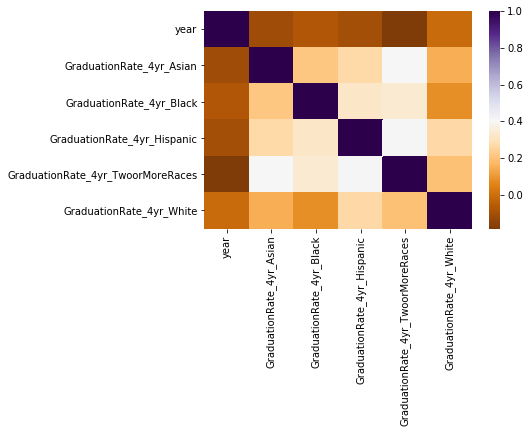

In [52]:
# Create heatmap using seaborn library https://python-graph-gallery.com/91-customize-seaborn-heatmap/
corr_matrix=df_4yrGradRate_Race_subset.corr()
sns.heatmap(corr_matrix, cmap='PuOr')
#sns.plt.show()

## Explore Attributes and Class

For this section, the target or dependent variable will be 'binary_sat_avg_score_num', which is a 1 for SAT average scores 1000 and above and a 0 for average scores below 999. 

We will start with transposed (for easier viewing) .describe lists of both the 1 and the 0 classifications.

In [53]:
# code REFERENCE: https://github.com/eclarson
# This section shows SAT scores 1000 and above. 
df_final[df_final.binary_sat_avg_score_num==1].describe().transpose()

count           mean  \
student_num                                         829.0     979.694813   
lea_avg_student_num                                 829.0     902.342581   
st_avg_student_num                                  829.0     834.715320   
Biology_Size                                        829.0      19.501809   
English II_Size                                     829.0      20.229192   
Math I_Size                                         829.0      18.572979   
lea_total_expense_num                               829.0    8994.068504   
lea_salary_expense_pct                              829.0       0.704895   
lea_services_expense_pct                            829.0       0.078270   
lea_supplies_expense_pct                            829.0       0.077093   
lea_instruct_equip_exp_pct                          829.0       0.008710   
lea_federal_perpupil_num                            829.0     966.330012   
lea_local_perpupil_num                              829.0    2228.076043   
lea_state_perpupil_num                              829.0    5799.662449   
SPG Score                                           829.0      78.138721   
EVAAS Growth Score                                  829.0      78.484077   
English II Score                                    829.0      69.700844   
Biology Score                                       829.0      64.761158   
ACT WorkKeys Score                                  829.0      60.427021   
ACTMath_ACTBenchmark_All                            829.0      37.667672   
ACTScience_ACTBenchmark_All                         829.0      30.129192   
ACTWriting_ACTBenchmark_All                         829.0      36.857298   
EOCSubjects_CACR_All                                829.0      56.586731   
GraduationRate_5yr_All                              829.0      90.755609   
ACTCompositeScore_UNCMin_Female                     829.0      74.555127   
ACTEnglish_ACTBenchmark_Female                      829.0      58.301689   
ACTWorkKeys_SilverPlus_Female                       829.0      55.263088   
EOCEnglish2_CACR_Female                             829.0      64.516043   
GraduationRate_4yr_Female                           829.0      93.259349   
GraduationRate_5yr_Female                           829.0      91.935947   
ACTMath_ACTBenchmark_Male                           829.0      39.431001   
ACTScience_ACTBenchmark_Male                        829.0      31.210012   
ACTWorkKeys_SilverPlus_Male                         829.0      56.700000   
ACTWriting_ACTBenchmark_Male                        829.0      30.264294   
EOCBiology_CACR_Male                                829.0      55.698311   
EOCEnglish2_CACR_Male                               829.0      55.106273   
GraduationRate_4yr_Male                             829.0      88.670688   
GraduationRate_5yr_Male                             829.0      87.338239   
ACTCompositeScore_UNCMin_AmericanIndian             829.0       1.526417   
ACTMath_ACTBenchmark_AmericanIndian                 829.0       0.701086   
ACTSubtests_BenchmarksMet_AmericanIndian            829.0      10.916164   
ACTWorkKeys_SilverPlus_AmericanIndian               829.0       0.477443   
ACTWriting_ACTBenchmark_AmericanIndian              829.0       0.586128   
EOCBiology_CACR_AmericanIndian                      829.0       1.329071   
EOCEnglish2_CACR_AmericanIndian                     829.0       1.462002   
EOCMathI_CACR_AmericanIndian                        829.0       1.434258   
EOCSubjects_CACR_AmericanIndian                     829.0       7.270808   
GraduationRate_4yr_AmericanIndian                   829.0       2.744391   
GraduationRate_5yr_AmericanIndian                   829.0       2.595175   
ACTCompositeScore_UNCMin_Asian                      829.0      22.662847   
ACTSubtests_BenchmarksMet_Asian                     829.0      34.737153   
ACTWorkKeys_SilverPlus_Asian                        829.0       4.795537   
EOCBiology_CACR_Asian   

In [54]:
# code REFERENCE: https://github.com/eclarson
# This section shows SAT scores below 1000. 
df_final[df_final.binary_sat_avg_score_num==0].describe().transpose()

count           mean  \
student_num                                         1075.0     749.724651   
lea_avg_student_num                                 1075.0     774.410233   
st_avg_student_num                                  1075.0     823.449302   
Biology_Size                                        1075.0      17.957209   
English II_Size                                     1075.0      18.607442   
Math I_Size                                         1075.0      17.988837   
lea_total_expense_num                               1075.0    9169.903377   
lea_salary_expense_pct                              1075.0       0.643814   
lea_services_expense_pct                            1075.0       0.083328   
lea_supplies_expense_pct                            1075.0       0.084996   
lea_instruct_equip_exp_pct                          1075.0       0.009522   
lea_federal_perpupil_num                            1075.0    1178.723479   
lea_local_perpupil_num                              1075.0    1946.422484   
lea_state_perpupil_num                              1075.0    6044.757414   
SPG Score                                           1075.0      65.483721   
EVAAS Growth Score                                  1075.0      73.405395   
English II Score                                    1075.0      52.795349   
Biology Score                                       1075.0      46.313488   
ACT WorkKeys Score                                  1075.0      55.786047   
ACTMath_ACTBenchmark_All                            1075.0      17.506977   
ACTScience_ACTBenchmark_All                         1075.0      13.595256   
ACTWriting_ACTBenchmark_All                         1075.0      20.166605   
EOCSubjects_CACR_All                                1075.0      37.814512   
GraduationRate_5yr_All                              1075.0      82.010047   
ACTCompositeScore_UNCMin_Female                     1075.0      51.517023   
ACTEnglish_ACTBenchmark_Female                      1075.0      35.726884   
ACTWorkKeys_SilverPlus_Female                       1075.0      51.398326   
EOCEnglish2_CACR_Female                             1075.0      46.692837   
GraduationRate_4yr_Female                           1075.0      84.117674   
GraduationRate_5yr_Female                           1075.0      82.891535   
ACTMath_ACTBenchmark_Male                           1075.0      18.433767   
ACTScience_ACTBenchmark_Male                        1075.0      14.000558   
ACTWorkKeys_SilverPlus_Male                         1075.0      52.842140   
ACTWriting_ACTBenchmark_Male                        1075.0      14.816000   
EOCBiology_CACR_Male                                1075.0      36.911814   
EOCEnglish2_CACR_Male                               1075.0      36.210047   
GraduationRate_4yr_Male                             1075.0      77.997023   
GraduationRate_5yr_Male                             1075.0      77.932465   
ACTCompositeScore_UNCMin_AmericanIndian             1075.0       2.665023   
ACTMath_ACTBenchmark_AmericanIndian                 1075.0       0.621674   
ACTSubtests_BenchmarksMet_AmericanIndian            1075.0       7.102884   
ACTWorkKeys_SilverPlus_AmericanIndian               1075.0       2.819442   
ACTWriting_ACTBenchmark_AmericanIndian              1075.0       0.936465   
EOCBiology_CACR_AmericanIndian                      1075.0       2.699814   
EOCEnglish2_CACR_AmericanIndian                     1075.0       2.521674   
EOCMathI_CACR_AmericanIndian                        1075.0       2.203349   
EOCSubjects_CACR_AmericanIndian                     1075.0       7.334884   
GraduationRate_4yr_AmericanIndian                   1075.0       5.697488   
GraduationRate_5yr_AmericanIndian                   1075.0       6.125395   
ACTCompositeScore_UNCMin_Asian                      1075.0       8.181023   
ACTSubtests_BenchmarksMet_Asian                     1075.0      17.972930   
ACTWorkKeys_SilverPlus_Asian                     

Now let's group by the SPG score grouped variable we created earlier. The interesting this here is to note that the higher the school performance grade, the more SAT scores 1000 and above. At this time, we don't know if the SPG is calculated using the SAT scores.  

In [55]:
#code REFERENCE: https://github.com/eclarson/DataMiningNotebooks
df_grouped = df_final.groupby(by=['SPGPercentGroup'])
print ("Percentage of SAT scores above 1000 in each group:")
print (df_grouped.binary_sat_avg_score_num.sum() / df_grouped.binary_sat_avg_score_num.count() *100)

Percentage of SAT scores above 1000 in each group:
SPGPercentGroup
low        9.842520
medium    47.071353
high      73.741794
Name: binary_sat_avg_score_num, dtype: float64


Now we will group the binary SAT score classifier with the SPG group categories and tie them to the mean LEA total expense numbers, followed by a bar chart to better visualize the relation. 


In [56]:
dfg = df_final.groupby(['binary_lea_sat_avg_score_num', 'SPGPercentGroup']).agg({'lea_total_expense_num': 'mean'})
dfg

lea_total_expense_num
binary_lea_sat_avg_score_num SPGPercentGroup                       
0                            low                        9409.321902
                             medium                     9110.257667
                             high                       9126.434725
1                            low                        8834.049143
                             medium                     8971.560798
                             high                       8962.938982

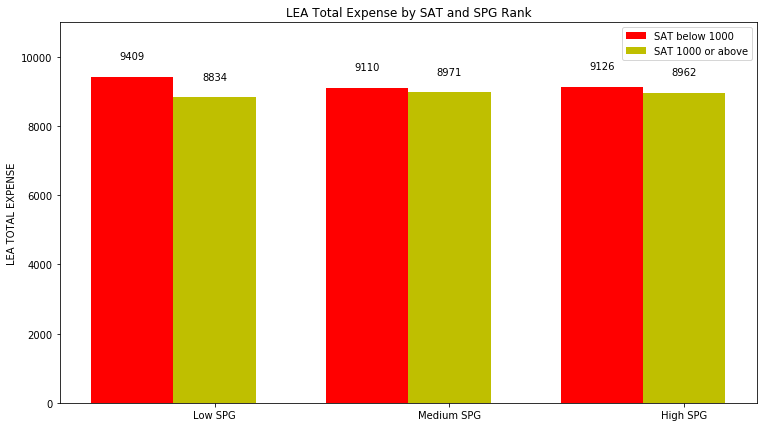

In [57]:
# code REFERENCE: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# MATPLOTLIB


SAT_GTE_1000 = dfg.loc[1, :]
SAT_LT_1000 = dfg.loc[0, :]
 
# more or less copied from matplotlib's own
# api example
fig, ax = plt.subplots(1, 1, figsize=(12.5, 7))
 
N = 3
 
ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars
 
rects1 = ax.bar(ind, SAT_LT_1000.lea_total_expense_num, width, color='r')
rects2 = ax.bar(ind + width, SAT_GTE_1000.lea_total_expense_num, width, color='y')
 
# add some text for labels, title and axes ticks
ax.set_ylabel('LEA TOTAL EXPENSE')
ax.set_title('LEA Total Expense by SAT and SPG Rank')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Low SPG', 'Medium SPG', 'High SPG'))
 
ax.legend((rects1[0], rects2[0]), ('SAT below 1000', 'SAT 1000 or above'))
 
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
 
ax.set_ylim(0, 11000)        
 
autolabel(rects1)
autolabel(rects2)
 
plt.show()


The results of the bar chart above are counterintuitive if you look at the higher SAT scores appear to be correlated with the lower LEA Total Expense in all three SPG categories. The results are certainly interesting and could warrant further investigation to determine why this appears to be the case.  

## Exceptional Work

### Exceptional Work: PCA dimension reduction
This section we will take a look using principal component analysis. 

In [58]:
# Reference https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
train_y = df_final['SPGPercentGroup']
train_x = df_final.drop('SPGPercentGroup', axis=1)
from sklearn.preprocessing import StandardScaler
# Separating out the target
y = df_final.loc[:,['binary_sat_avg_score_num']].values
# Standardizing the features
x = StandardScaler().fit_transform(train_x)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [60]:
finalDf = pd.concat([principalDf, train_y], axis = 1)

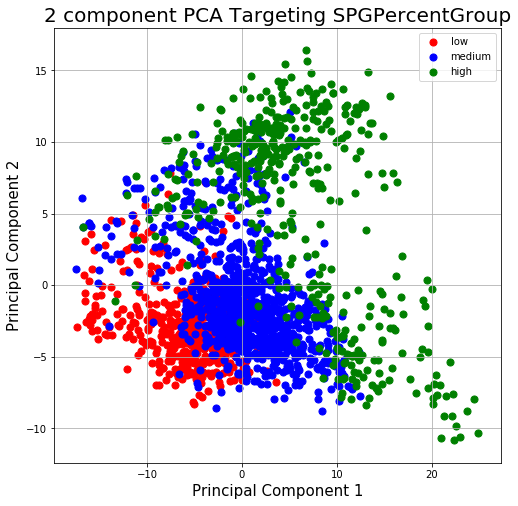

In [61]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Targeting SPGPercentGroup', fontsize = 20)
targets = ['low', 'medium', 'high']
colors = ['r', 'b', 'g']
for train_y, color in zip(targets,colors):
    indicesToKeep = finalDf['SPGPercentGroup'] == train_y
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The target SPG percent group is a 3 level categorical feature that this analysis looked at vs. the binary output of SAT score above or below 1000. There does appear to be some separation in the graphical view between the different SPG levels. Per the output below, the first two principal components account for about 25% of the variance in the data. 

In [62]:
print(pca.explained_variance_ratio_)

[0.15565543 0.0980679 ]


<function matplotlib.pyplot.show>

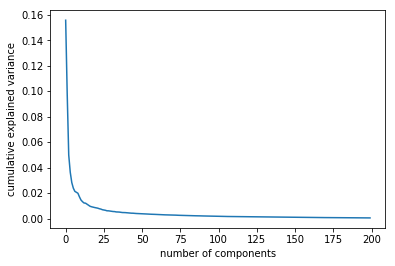

In [63]:
# Explained Variance
pca_big = PCA(n_components=200)
principalComponents_big = pca_big.fit_transform(x)
plt.plot(pca_big.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show


Finally, the scree plot shows the variance explained by each principal component. This plot shows that with about 20 principal components, most of the variation in the data can be explained. 

### Exceptional Work: Recursive Feature Elimination

In [64]:
# code Reference: https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
# additional code reference: https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

train_y = df_final['binary_sat_avg_score_num']
train_x = df_final.drop(['binary_sat_avg_score_num','SPGPercentGroup'], axis=1)
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(train_x, train_y)
colnames = train_x.columns


# Create empty dictionary to store the mean value calculated from all the scores.
# This is in place so that can easily add other feature ranking methods such as random forest and take the averages. 

# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))



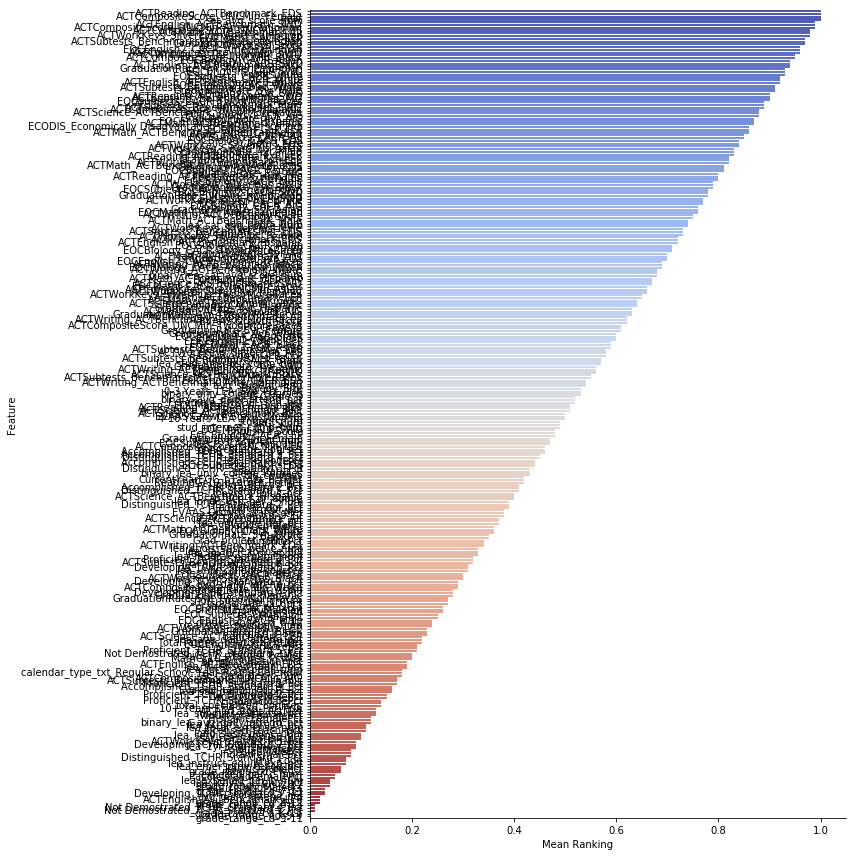

In [65]:
# code Reference: https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
# additional code reference: https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
# print("\t%s" % "\t".join(methods))
# for name in colnames:
#     print("%s\t%s" % (name, "\t".join(map(str, 
#                         [ranks[method][name] for method in methods]))))
    
    
# print summaries for the selection of attributes
# print(rfe.support_)
# print(rfe.ranking_)

# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=12, aspect=1, palette='coolwarm')

RFE seemed really too simple with Scikit Learn. It does take a while to run though. So there's the list. Gonna show top 10 below instead of cleaning this one up for now. The response variable was the binary SAT score feature. 

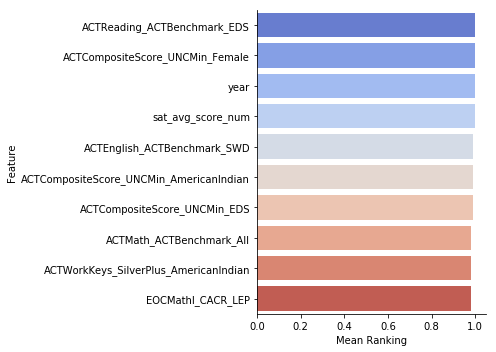

In [66]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False).head(10)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=5, aspect=1.4, palette='coolwarm')

### Exceptional Work (or another Visualize Attributes / Joint Attributes item): Violin Plots
**Create new dataset for accDrillDown data visualization and analysis**

**accDrillDown** dataset is a raw dataset that contains accountability data from school cards including statistical information of subjects including EOG, EOC, The ACT, ACT WorkKeys, Math Course Rigor (Passing Math III), and Cohort Graduation Rate by each race, gender and other features of schools.  

*When this dataset was merged into final mechine learning dataset, attributes of all subjects and all features(race, gender and others) were combined in order to transform data to a short table. During mergging, a very large part of the combination attributes were dropped due to high correlation. When we need to analysis the relationships between subjects and features, we can not get enough data from final mechine learing dataset. *

*This part is to create a complete and transformed highschool dataset of **accDillDown** data for further visualization and analysis *

In [67]:
#Import data from accDrillDown and profile
df_2014Score = pd.read_csv(directory + '2014'+'/Raw Datasets/accDrillDown.csv',low_memory=False, dtype={'unit_code': object}) 
df_2014Score['year'] = 2014
df_2014Profile = pd.read_csv(directory + '2014'+'/Raw Datasets/Profile.csv',low_memory=False, dtype={'unit_code': object}) # read in the csv file

df_2015Score = pd.read_csv(directory + '2015'+'/Raw Datasets/accDrillDown.csv',low_memory=False, dtype={'unit_code': object}) 
df_2015Score['year'] = 2015
df_2015Profile = pd.read_csv(directory + '2015'+'/Raw Datasets/Profile.csv',low_memory=False, dtype={'unit_code': object}) # read in the csv file

df_2016Score = pd.read_csv(directory + '2016'+'/Raw Datasets/accDrillDown.csv',low_memory=False, dtype={'unit_code': object})  
df_2016Score['year'] = 2016
df_2016Profile = pd.read_csv(directory + '2016'+'/Raw Datasets/Profile.csv',low_memory=False, dtype={'unit_code': object})  # read in the csv file

df_2017Score = pd.read_csv(directory + '2017'+'/Raw Datasets/accDrillDown.csv',low_memory=False, dtype={'unit_code': object}) 
df_2017Score['year'] = 2017
df_2017Profile = pd.read_csv(directory + '2017'+'/Raw Datasets/Profile.csv',low_memory=False, dtype={'unit_code': object})  # read in the csv file


FileNotFoundError: File b'C:/Users/flip/Desktop/SMU/MSDS7331/data/HighML/2014/Raw Datasets/accDrillDown.csv' does not exist

In [ ]:
#Merge accDrillDown and profile by unicode
df_2014Score=pd.merge(df_2014Score,df_2014Profile[['unit_code','category_cd','student_num','type_cd','school_type_txt']], 
                      how = 'left')

df_2015Score=pd.merge(df_2015Score,df_2015Profile[['unit_code','category_cd','student_num','type_cd','school_type_txt']], 
                      how = 'left')

df_2016Score=pd.merge(df_2016Score,df_2016Profile[['unit_code','category_cd','student_num','type_cd','school_type_txt']], 
                      how = 'left')

df_2017Score=pd.merge(df_2017Score,df_2017Profile[['unit_code','category_cd','student_num','type_cd','school_type_txt']], 
                      how = 'left')

# Create data for all high school only
df_ScoreHS2014 = df_2014Score[((df_2014Score.category_cd == 'H') | 
                             (df_2014Score.category_cd == 'T') | 
                             (df_2014Score.category_cd == 'A')) &
                             (df_2014Score.student_num > 0) & 
                             (df_2014Score.type_cd == 'P') & 
                             (df_2014Score.school_type_txt == 'Regular School')
                            ]

df_ScoreHS2015 = df_2015Score[((df_2015Score.category_cd == 'H') | 
                             (df_2015Score.category_cd == 'T') | 
                             (df_2015Score.category_cd == 'A')) &
                             (df_2015Score.student_num > 0) & 
                             (df_2015Score.type_cd == 'P') & 
                             (df_2015Score.school_type_txt == 'Regular School')
                            ]

df_ScoreHS2016 = df_2016Score[((df_2016Score.category_cd == 'H') | 
                             (df_2016Score.category_cd == 'T') | 
                             (df_2016Score.category_cd == 'A')) &
                             (df_2016Score.student_num > 0) & 
                             (df_2016Score.type_cd == 'P') & 
                             (df_2016Score.school_type_txt == 'Regular School')
                            ]

df_ScoreHS2017 = df_2017Score[((df_2017Score.category_cd == 'H') | 
                             (df_2017Score.category_cd == 'T') | 
                             (df_2017Score.category_cd == 'A')) &
                             (df_2017Score.student_num > 0) & 
                             (df_2017Score.type_cd == 'P') & 
                             (df_2017Score.school_type_txt == 'Regular School')
                            ]

# df_ScoreHS2014.info()
# df_ScoreHS2015.info()
# df_ScoreHS2016.info()
# df_ScoreHS2017.info()

# merge all scores data of 4 years from 2014 to 2017
df_ScorePublicSchools = pd.concat([df_ScoreHS2014,df_ScoreHS2015,df_ScoreHS2016,df_ScoreHS2017], axis=0, join='inner')

# df_ScorePublicSchools.info()


In [ ]:
# # Write to local as csv format.
# df_ScorePublicSchools.to_csv(directory + 'df_ScorePublicSchools.csv', sep=',', index=False)

**Create Violinplot for Subjects Vs Race using new dataset**
In order to create violin plot for features, dataset need to be transformed to a long table with a new categorical attributes of features and a new numerical attributes of values.

In [ ]:
# Create Violinplot for Subjects Vs Race

# Set subjects. You can change it to any subjects in this database you want to compare.
Subject = ['The ACT - Math','The ACT - English']


# Create long table for data visualization and analysis.
# After transformation, new tables contains two new attributes: Race: categorical; PercentageOfMeetingACTBenchmark: numerical

# Create 2014 dataset
Year = 2014

df_operation = df_ScorePublicSchools[df_ScorePublicSchools.year == Year]
df_operation = df_operation[(df_operation.Subject==Subject[0])|(df_operation.Subject==Subject[1])] 


#Change some columns name with space
df_operation = df_operation.rename(columns={'Standard (CCR - Level 4 & 5, GLP - Level 3 & Above)':'Standard'})
df_operation = df_operation.rename(columns={'Two or More Races_Ct':'Two_Ct'})
df_operation = df_operation.rename(columns={'American Indian_Ct':'AmericanIndian_Ct'})


# Unpivots dataframe for race classification. 

df_operation = pd.melt(df_operation, id_vars=['unit_code','Subject','Standard','year',
                                             'AmericanIndian_Ct','White_Ct','Asian_Ct','Black_Ct','Hispanic_Ct','Two_Ct'],                                             
                          value_vars=['American Indian','White','Asian','Black','Hispanic','Two or More Races'],
                          var_name='Race', value_name='PercentageOfMeetingACTBenchmark')

#Drop rows that with 0 count of students for every race.

df_operation = df_operation[~(((df_operation.Race=='White')&(df_operation.White_Ct== 0))|
                            ((df_operation.Race=='Asian')&(df_operation.Asian_Ct== 0))|
                            ((df_operation.Race=='Black')&(df_operation.Black_Ct== 0))|
                            ((df_operation.Race=='Hispanic')&(df_operation.Hispanic_Ct== 0))|
                            ((df_operation.Race=='American Indian')&(df_operation.AmericanIndian_Ct== 0))|
                            ((df_operation.Race=='Two or More Races')&(df_operation.Two_Ct== 0)))]
df_operation2014=df_operation

# Create 2015 dataset
Year = 2015

df_operation = df_ScorePublicSchools[df_ScorePublicSchools.year == Year]
df_operation = df_operation[(df_operation.Subject==Subject[0])|(df_operation.Subject==Subject[1])] 


#Change some column name with space
df_operation = df_operation.rename(columns={'Standard (CCR - Level 4 & 5, GLP - Level 3 & Above)':'Standard'})
df_operation = df_operation.rename(columns={'Two or More Races_Ct':'Two_Ct'})
df_operation = df_operation.rename(columns={'American Indian_Ct':'AmericanIndian_Ct'})

# Unpivots dataframe for race classification

df_operation = pd.melt(df_operation, id_vars=['unit_code','Subject','Standard','year',
                                             'AmericanIndian_Ct','White_Ct','Asian_Ct','Black_Ct','Hispanic_Ct','Two_Ct'],                                             
                          value_vars=['American Indian','White','Asian','Black','Hispanic','Two or More Races'],
                          var_name='Race', value_name='PercentageOfMeetingACTBenchmark')

#Drop rows that with 0 count of students for every race.

df_operation = df_operation[~(((df_operation.Race=='White')&(df_operation.White_Ct== 0))|
                            ((df_operation.Race=='Asian')&(df_operation.Asian_Ct== 0))|
                            ((df_operation.Race=='Black')&(df_operation.Black_Ct== 0))|
                            ((df_operation.Race=='Hispanic')&(df_operation.Hispanic_Ct== 0))|
                            ((df_operation.Race=='American Indian')&(df_operation.AmericanIndian_Ct== 0))|
                            ((df_operation.Race=='Two or More Races')&(df_operation.Two_Ct== 0)))]
df_operation2015=df_operation

# Create 2016 dataset
Year = 2016

df_operation = df_ScorePublicSchools[df_ScorePublicSchools.year == Year]
df_operation = df_operation[(df_operation.Subject==Subject[0])|(df_operation.Subject==Subject[1])] 


#Change some column name with space
df_operation = df_operation.rename(columns={'Standard (CCR - Level 4 & 5, GLP - Level 3 & Above)':'Standard'})
df_operation = df_operation.rename(columns={'Two or More Races_Ct':'Two_Ct'})
df_operation = df_operation.rename(columns={'American Indian_Ct':'AmericanIndian_Ct'})

# Unpivots dataframe for race classification

df_operation = pd.melt(df_operation, id_vars=['unit_code','Subject','Standard','year',
                                             'AmericanIndian_Ct','White_Ct','Asian_Ct','Black_Ct','Hispanic_Ct','Two_Ct'],                                             
                          value_vars=['American Indian','White','Asian','Black','Hispanic','Two or More Races'],
                          var_name='Race', value_name='PercentageOfMeetingACTBenchmark')

#Drop rows that with 0 count of students for every race.

df_operation = df_operation[~(((df_operation.Race=='White')&(df_operation.White_Ct== 0))|
                            ((df_operation.Race=='Asian')&(df_operation.Asian_Ct== 0))|
                            ((df_operation.Race=='Black')&(df_operation.Black_Ct== 0))|
                            ((df_operation.Race=='Hispanic')&(df_operation.Hispanic_Ct== 0))|
                            ((df_operation.Race=='American Indian')&(df_operation.AmericanIndian_Ct== 0))|
                            ((df_operation.Race=='Two or More Races')&(df_operation.Two_Ct== 0)))]
df_operation2016=df_operation

# Create 2017 dataset
Year = 2017

df_operation = df_ScorePublicSchools[df_ScorePublicSchools.year == Year]
df_operation = df_operation[(df_operation.Subject==Subject[0])|(df_operation.Subject==Subject[1])] 


#Change some column name with space
df_operation = df_operation.rename(columns={'Standard (CCR - Level 4 & 5, GLP - Level 3 & Above)':'Standard'})
df_operation = df_operation.rename(columns={'Two or More Races_Ct':'Two_Ct'})
df_operation = df_operation.rename(columns={'American Indian_Ct':'AmericanIndian_Ct'})

# Unpivots dataframe for race classification. 

df_operation = pd.melt(df_operation, id_vars=['unit_code','Subject','Standard','year',
                                             'AmericanIndian_Ct','White_Ct','Asian_Ct','Black_Ct','Hispanic_Ct','Two_Ct'],                                             
                          value_vars=['American Indian','White','Asian','Black','Hispanic','Two or More Races'],
                          var_name='Race', value_name='PercentageOfMeetingACTBenchmark')

# Drop all rows that with 0 student counts for any race .

df_operation = df_operation[~(((df_operation.Race=='White')&(df_operation.White_Ct== 0))|
                            ((df_operation.Race=='Asian')&(df_operation.Asian_Ct== 0))|
                            ((df_operation.Race=='Black')&(df_operation.Black_Ct== 0))|
                            ((df_operation.Race=='Hispanic')&(df_operation.Hispanic_Ct== 0))|
                            ((df_operation.Race=='American Indian')&(df_operation.AmericanIndian_Ct== 0))|
                            ((df_operation.Race=='Two or More Races')&(df_operation.Two_Ct== 0)))]
df_operation2017=df_operation

In [ ]:
# create violinplots

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2,figsize=(20,20))

sns.violinplot(x="Race", y="PercentageOfMeetingACTBenchmark",
               hue = "Subject", data=df_operation2014,
               split=True, inner="quart",ax = axes[0,0],scale="count")

axes[0,0].set_title('2014 - NC Public High School, Race vs ACT English and ACT Math',fontsize=12)

sns.violinplot(x="Race", y="PercentageOfMeetingACTBenchmark",
               hue = "Subject", data=df_operation2015,
               split=True, inner="quart",ax = axes[0,1])
axes[0,1].set_title('2015 - NC Public High School, Race vs ACT English and ACT Math',fontsize=12)

sns.violinplot(x="Race", y="PercentageOfMeetingACTBenchmark",
               hue = "Subject", data=df_operation2016,
               split=True, inner="quart",scale="count",ax = axes[1,0])
axes[1,0].set_title('2016 - NC Public High School, Race vs ACT English and ACT Math',fontsize=12)

sns.violinplot(x="Race", y="PercentageOfMeetingACTBenchmark",
               hue = "Subject", data=df_operation2017,
               split=True, inner="quart",ax = axes[1,1])
axes[1,1].set_title('2017 - NC Public High School, Race vs ACT English and ACT Math',fontsize=12)


<img src="files/ViolinPlot.png">

**Interesting facts Analysis**

From violine plots above, we can see ACT-english and ACT math benchmark meeting rate distribution for each race in 4 years. Compare to year 2014 and 2015, distributions of year 2016 and 2017 are changed dramatically except for White. This is not very normal. We investigeted the original data, this might caused by NA filter of student counts. Further investigation and transformation need to be performed if we want to analysis this part of data.

## Future Direction
We have explored this data in several different ways. It is now time to start targeting specific results. Those results may require us to walk back up the pipeline to create new or different combinations of features. We look forward to continuing this effort and to start using some machine learning classifiers. We also would like to finish the pipeline code in the Appendix to have our own data preprocessing in place. 

## References
The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC


## Appendix A: Data Management

This section will contain our take on the data acquisition pipeline infromation from source URL to the final machine learning data set. We attempted to include this in the project for completeness and to have the raw and school interim data sets defined for EDA (since ML data sets already cleaned). The team understands this section is likely not a part of the graded work other than possible exceptional work points and moved it here to the appendix when we ran into cells taking too long to run or erroring out sporadically (mainly accdrilldwn17 URL seemed to always timeout). The main difference in the code below is we grouped all the years 2014-2017 into the same raw dataset. The original goal was a turnkey project that wouldn't require external .csv files to be used with the notebook. 

Main issues why we shelved it for now: 
1. Overall takes a long time for all of these to download. 
2. ec_pupils cell doesn't work 100% of the time, but rerunning the cell after failure usually works. ???
3. accdrilldwn cells take FOREVER to run. accdrilldwn17 cell has never worked. We checked the URL and it is active, but cant get that one to work. We even tried RawDataFiles2017.ipynb from Jake's github and it's not working currently.  

In the end we decided to work from the ML .csv file already created in order to avoid any trouble with this code early on in the project document. This very well could be a local computer memory issue, but didn't want to risk having all this code up front of the project blow up on the grader.  

- It is important to note that most of the data ingest code and documentation we will use in this section is taken directly from Jake Drew's github at https://github.com/jakemdrew/EducationDataNC with minor code alterations denoted at the start of each code section. The main difference is we grouped all the years 2014-2017 into the same raw dataset. 

In [ ]:
#Location where copies of the raw data files will be read in from csv files.
dataDir = 'C:/Users/flip/Desktop/SMU/MSDS7331/data/'

#Location where the new school datasets will be created.
outputDir = 'C:/Users/flip/Desktop/SMU/MSDS7331/data/School Datasets/'

In [ ]:
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
# Alterations from reference code include combination of 2014-2017 data into all files.

# Download the raw data OR read in the .csv files at the dataDir path

#Profile Table filtered by schoolYear (years 2006-2017 at this URL)
url="http://www.ncpublicschools.org/docs/src/researchers/profile.xlsx"
profile = pd.read_excel(url, dtype={'unit_code': object})
profile = profile[profile.year >= 2014]
profile.to_csv(dataDir + 'profile.csv', sep=',', index=False) 

#Profile Metric Table filtered by schoolYear (years 2002-2017 at this URL)  
url="http://www.ncpublicschools.org/docs/src/researchers/profile-metrics.xlsx"
profileMetric = pd.read_excel(url, dtype={'unit_code': object})
profileMetric = profileMetric[profileMetric.year >= 2014]
profileMetric.to_csv(dataDir + 'profile-metrics.csv', sep=',', index=False) 

#Funding Table (years 2002-2017 at this URL) 
url='http://www.ncpublicschools.org/docs/src/researchers/funding.xlsx'
funding = pd.read_excel(url, dtype={'unit_code': object})
funding = funding[funding.year >= 2014]
funding.to_csv(dataDir + 'funding.csv', sep=',', index=False) 

#Read To Achieve (RTA) (years 2014-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/rta.xlsx'
rta = pd.read_excel(url, dtype={'unit_code': object})
rta = rta[rta.year >= 2014]
rta.to_csv(dataDir + 'rta.csv', sep=',', index=False)

#Participation Targets Overall Table (years 2013-2017 at this URL)
url='http://www.ncpublicschools.org/docs/accountability/reporting/participation-targets.xlsx'
pTargets = pd.read_excel(url, dtype={'unit_code': object})
pTargets = pTargets[pTargets.year >= 2014]
pTargets.to_csv(dataDir + 'participation-targets.csv', sep=',', index=False)

#School Indicators Table (years 2002-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/school-indicators.xlsx'
schoolInds = pd.read_excel(url, dtype={'Unit_Code': object})
#Rename primary key and year for consistency
schoolInds = schoolInds.rename({'Unit_Code':'unit_code','Year':'year'}, axis=1)
schoolInds = schoolInds[schoolInds.year >= 2014]
schoolInds.to_csv(dataDir + 'school-indicators.csv', sep=',', index=False)

#Specialized Course Enrollment Table (years 2014-2017 at this URL) 
url='http://www.ncpublicschools.org/docs/src/researchers/sce.xlsx'
sce = pd.read_excel(url, dtype={'unit_code': object})
sce = sce[sce.year >= 2014]
sce.to_csv(dataDir + 'sce.csv', sep=',', index=False)

#College Enrollment Table (years 2011-2015 at this URL)  
#Tracks college enrollment within 16 mos of graduation
url='http://www.ncpublicschools.org/docs/src/researchers/college-enrollment.xlsx'
collegeEnroll = pd.read_excel(url, dtype={'unit_code': object})
#Most recent graduation year runs two years behind current school year in this table 
collegeEnroll = collegeEnroll[collegeEnroll.graduation_year >= 2014 - 2]
collegeEnroll.to_csv(dataDir + 'college-enrollment.csv', sep=',', index=False)

#Environment Table (years 2006-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/environment.xlsx'
environment = pd.read_excel(url, dtype={'unit_code': object})
environment= environment[environment.year >= 2014]
environment.to_csv(dataDir + 'environment.csv', sep=',', index=False)

#Personnel Table (years 2006-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/personnel.xlsx'
personnel = pd.read_excel(url, dtype={'unit_code': object})
personnel= personnel[personnel.year >= 2014]
personnel.to_csv(dataDir + 'personnel.csv', sep=',', index=False)

#Educator Experience Table (YOE) (years 2006-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/yoe.xlsx'
yoe = pd.read_excel(url, dtype={'unit_code': object})
yoe = yoe[yoe.year >= 2014]
yoe.to_csv(dataDir + 'yoe.csv', sep=',', index=False)

#Educator Effectiveness (years 2011-2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/effectiveness.xlsx'
effectiveness = pd.read_excel(url, dtype={'unit_code': object})
effectiveness = effectiveness[effectiveness.year >= 2014]
effectiveness.to_csv(dataDir + 'effectiveness.csv', sep=',', index=False)

In [ ]:
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
# ***************  2017 Data Only in These Tables

# Download the raw data OR read in the .csv files at the dataDir path

#Student Readiness Table (years 2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/acc-student-readiness.xlsx'
readiness = pd.read_excel(url, dtype={'unit_code': object})
#Remove all masking from numeric fields
readiness = readiness.replace({"*":0, ">95":100, "<5":0, "<10":5 })
readiness = readiness[readiness.year >=2014]
#Save the new file as .csv
readiness.to_csv(dataDir + 'acc-student-readiness.csv', sep=',', index=False)
#Read the file back in from disk to get the correct data types now that the masking is removed. 
readiness = pd.read_csv(dataDir + 'acc-student-readiness.csv', low_memory=False, dtype={'unit_code': object})

#Economically Disadvantaged (years 2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/acc-ed-rates.xlsx'
edRates = pd.read_excel(url, dtype={'unit_code': object})
#Remove all masking from numeric fields
edRates = edRates.replace({"*":0, ">95":100, "<5":0, "<10":5 })
edRates = edRates[edRates.year >=2014]
#Save the new file as .csv
edRates.to_csv(dataDir + 'acc-ed-rates.csv', sep=',', index=False)
#Read the file back in from disk to get the correct data types now that the masking is removed. 
edRates = pd.read_csv(dataDir + 'acc-ed-rates.csv', low_memory=False, dtype={'unit_code': object}) 

#Career and Technical Education Table Concentrations (years 2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/cte-concentrations.xlsx'
concentrations = pd.read_excel(url, dtype={'unit_code': object})
concentrations = concentrations[concentrations.year  >=2014]
concentrations.to_csv(dataDir + 'cte-concentrations.csv', sep=',', index=False)

#Career and Technical Education Credentials (years 2017 at this URL)
url='http://www.ncpublicschools.org/docs/src/researchers/cte-credentials.xlsx'
credentials = pd.read_excel(url, dtype={'unit_code': object})
credentials = credentials[credentials.year >=2014]
credentials.to_csv(dataDir + 'cte-credentials.csv', sep=',', index=False)

In [ ]:
# SPG Files that need to be combined from different URLs
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
# Alterations from the reference code include adding year column since these data sets did not have one. 
# Alterations from reference code include combination of 2014-2017 data into all files.

# Download the raw data OR read in the .csv files at the dataDir path

#School Performance Grade (SPG) (years 2014-2017)
urls17 = 'http://www.ncpublicschools.org/docs/accountability/reporting/2017/reports/spg1617.xlsx'
urls16 = 'http://www.ncpublicschools.org/docs/accountability/reporting/spg1516.xlsx'
urls15 = 'http://www.ncpublicschools.org/docs/accountability/reporting/spg1415.xlsx'
urls14 = 'http://www.ncpublicschools.org/docs/accountability/reporting/spg1314.xlsx'
#This file has header data above the field names
spg14 = pd.read_excel(urls14, dtype={'School Code' : object}, skiprows=4)
spg14['year'] = 2014
spg15 = pd.read_excel(urls15, dtype={'School Code' : object}, skiprows=7)
spg15['year'] = 2015
spg16 = pd.read_excel(urls16, dtype={'School Code' : object}, skiprows=6)
spg16['year'] = 2016
spg17 = pd.read_excel(urls17, dtype={'School Code' : object}, skiprows=6)
spg17['year'] = 2017
spg = pd.concat([spg14, spg15, spg16, spg17])

#Remove *, \r, and \n from column names 
spg.rename(columns=lambda x: x.replace('*','').strip(), inplace=True)  
spg.rename(columns=lambda x: x.replace('\r',' '), inplace=True) 
spg.rename(columns=lambda x: x.replace('\n',' '), inplace=True) 
#Remove all masking from numeric fields
spg = spg.replace({"*":0, ">95":100, "<5":0, "<10":5 })
#Rename primary key to unit_code
spg = spg.rename({'School Code':'unit_code'}, axis=1)
#Save the new file as .csv
spg.to_csv(dataDir + 'spg.csv', sep=',', index=False)  
#Read the file back in from disk to get the correct data types now that the masking is removed. 
spg = pd.read_csv(dataDir + 'spg.csv', low_memory=False, dtype={'unit_code': object}) 
    


In [ ]:
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC
#Statistical Profiles - Student Body Racial Compositions at the School Level
import io
import requests
url='http://apps.schools.nc.gov/ords/f?p=145:221::CSV::::'
#Passing this URL directly into pd.read_csv() threw HTTP errors - This is my workaround
s = requests.get(url).content
ec_pupils = pd.read_csv(io.StringIO(s.decode('utf-8')), low_memory=False
                        , dtype={'LEA': object,'School': object})
#Rename year for consistency
ec_pupils.rename({'Year':'year'}, axis=1, inplace=True)
ec_pupils = ec_pupils[ec_pupils.year >= 2014]
#Create unit_code from LEA and School code as an index
ec_pupils['unit_code'] = ec_pupils['LEA'] + ec_pupils['School']
#Save the original data to disk 
ec_pupils.to_csv(dataDir + 'ec_pupils.csv', sep=',', index=False)

In [ ]:
#READY Accountability Drill Down (years 2014-2017)
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

urla14 = 'http://www.ncpublicschools.org/docs/accountability/reporting/acctdrilldwn14.xlsx'
#This file has header data above the field names
accDrillDown14 = pd.read_excel(urla14, dtype={'School Code': object}, skiprows=4)
accDrillDown14['year'] = 2014

In [ ]:
#READY Accountability Drill Down (years 2014-2017)
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

urla15 = 'http://www.ncpublicschools.org/docs/accountability/reporting/accdrilldwn15.xlsx'
#This file has header data above the field names
accDrillDown15 = pd.read_excel(urla15, dtype={'School Code': object}, skiprows=6)
accDrillDown15['year'] = 2015

In [ ]:
#READY Accountability Drill Down (years 2014-2017)
#CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

urla16 = 'http://www.ncpublicschools.org/docs/accountability/reporting/accdrilldwn16.xlsx'
#This file has header data above the field names
accDrillDown16 = pd.read_excel(urla16, dtype={'School Code': object}, skiprows=6)
accDrillDown16['year'] = 2016

In [ ]:
### This one keeps timing out. Did double check the URLs for all 4 of these ###

# READY Accountability Drill Down (years 2014-2017)
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

urla17 = 'http://www.ncpublicschools.org/docs/accountability/reporting/2017/reports/accdrilldwn17.xlsx'
#This file has header data above the field names
accDrillDown17 = pd.read_excel(urla17, dtype={'School Code': object}, skiprows=6)
accDrillDown17['year'] = 2017

In [ ]:
#READY Accountability Drill Down (years 2014-2017)
# CODE REFERENCE: https://github.com/jakemdrew/EducationDataNC

accDrillDown = pd.concat([accDrillDown14, accDrillDown15, accDrillDown16,accDrillDown17])
# Rename duplicate columns names to be more descriptive 
accDrillDown.rename(columns=lambda x: x.replace('.1','_Ct').strip(), inplace=True)
#Rename primary key to unit_code
accDrillDown = accDrillDown.rename({'School Code':'unit_code'}, axis=1)
#Remove all masking from numeric fields
accDrillDown = accDrillDown.replace({"*":0, ">95":100, "<5":0, "<10":5 })
#Save the new file as .csv
accDrillDown.to_csv(dataDir + 'accDrillDown.csv', sep=',', index=False)
#Read the file back in from disk to get the correct data types now that the masking is removed. 
accDrillDown = pd.read_csv(dataDir + 'accDrillDown.csv', low_memory=False, dtype={'unit_code': object})